# <font color=blue> Summary/Wrap-up </font>
- <font size='+1'><b>  Define problem </b></font>:
 1. Predict price of used car with given features by <font color=red><b>regression</b></font>
 2. Idenfiy significant features

- <font size='+1'><b>Datasets </b></font>:(tabular) 
    raw data from used-car price dataset ;  train.csv; test.csv
- <font size='+1'><b>Models</b></font>:Regression 
      (LassoCV, linear regression;Xgboost)
- <font size='+1'><b>process</b></font>:
     - Clean and format raw data
     - preprocess 
     - EDA
     - Evaluate algorithms  (LassoCV, linear regression Xgboost)
     - Improve results (Xgboost)
         - train size
         - hyper-parameters selction
      
 - <font size='+1'><b>Matrics</b></font>:RMSE
 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import  matplotlib.pyplot  as plt

import warnings

%matplotlib inline 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#
pd.options.mode.use_inf_as_na = True
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-price-prediction-dataset/used_cars.csv
/kaggle/input/kagglex-train/train.csv
/kaggle/input/kagglextest/test.csv


/tmp/ipykernel_18/2772872165.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


# 1. Load/Check Dataset
- dataset size
- check missing|duplciated values
- check dtypes
- data distributions

In [2]:
df_test=pd.read_csv('/kaggle/input/kagglextest/test.csv')
print('The Full dataset is {}. with {} samples and {} columns'.format(df_test.shape,df_test.shape[0],df_test.shape[1]))
print('===')
print(df_test.info())
id_test=df_test['id']

The Full dataset is (36183, 12). with 36183 samples and 12 columns
===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            36183 non-null  int64 
 1   brand         36183 non-null  object
 2   model         36183 non-null  object
 3   model_year    36183 non-null  int64 
 4   milage        36183 non-null  int64 
 5   fuel_type     36183 non-null  object
 6   engine        36183 non-null  object
 7   transmission  36183 non-null  object
 8   ext_col       36183 non-null  object
 9   int_col       36183 non-null  object
 10  accident      36183 non-null  object
 11  clean_title   36183 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB
None


In [3]:
df_train=pd.read_csv('/kaggle/input/kagglex-train/train.csv')
print('The Full dataset is {}. with {} samples and {} columns'.format(df_train.shape,df_train.shape[0],df_train.shape[1]))
print('===')
print(df_train.info())
print('===')
print(df_train.describe())

The Full dataset is (54273, 13). with 54273 samples and 13 columns
===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB
None
===
                 id    model_year         milage         price
count  54273.000000  54273.000000   54273.000000  5.427300e+04
mean 

In [4]:
y_train=df_train['price']
df_train.drop(['price'],axis=1,inplace=True)

df=pd.concat([df_train,df_test],ignore_index=True,axis=0)
print(f"The train set is from 0 to {df_train.shape[0]-1}\n\
the test set is from {df_train.shape[0]} to end")
print(f" The df shape is {df.shape}")
df.drop(['id'],axis=1,inplace=True)

The train set is from 0 to 54272
the test set is from 54273 to end
 The df shape is (90456, 12)


In [5]:
df_org=pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')
print('The Full dataset is {}. with {} samples and {} columns'.format(df_org.shape,df_org.shape[0],df_org.shape[1]))
print('===')
print(df_org.info)

The Full dataset is (4009, 12). with 4009 samples and 12 columns
===
<bound method DataFrame.info of          brand                            model  model_year      milage  \
0         Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1      Hyundai                     Palisade SEL        2021  34,742 mi.   
2        Lexus                    RX 350 RX 350        2022  22,372 mi.   
3     INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4         Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   
...        ...                              ...         ...         ...   
4004   Bentley             Continental GT Speed        2023     714 mi.   
4005      Audi             S4 3.0T Premium Plus        2022  10,900 mi.   
4006   Porsche                           Taycan        2022   2,116 mi.   
4007      Ford                     F-150 Raptor        2020  33,000 mi.   
4008       BMW                     X3 xDrive30i        2020  43,000 mi.   

In [6]:
df.head()

brand          model  model_year  milage fuel_type  \
0     Ford   F-150 Lariat        2018   74349  Gasoline   
1      BMW          335 i        2007   80000  Gasoline   
2   Jaguar      XF Luxury        2009   91491  Gasoline   
3      BMW   X7 xDrive40i        2022    2437    Hybrid   
4  Pontiac  Firebird Base        2001  111000  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident clean_title  
0                    10-Speed A/T    Blue    Gray  None reported         Yes  
1                     6-Speed M/T   Black   Black  None reported         Yes  
2                     6-Speed A/T  Purple   Beige  None reported         Yes  
3  Transmission w/Dual Shift Mode    Gray   Brown  None reported         Yes  
4                             A/T   White   Black  None reported         Yes

In [7]:
# check duplication
df.duplicated().sum()

0

In [8]:
# check missing values
def check_miss_value(df):
    '''
    check the missing value in the dataset
    args:
        df pd dataframe
    return a barh plot or 
    '''
    miss=df.isnull().sum()
    miss=miss[miss>0]
    miss.sort_values(inplace=True)
    
    try:
        print(miss)
        miss.plot.barh()
    except:
        print("No value missing")
        

Series([], dtype: int64)
No value missing


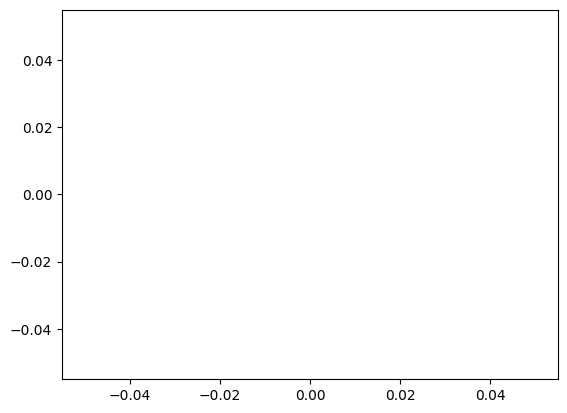

In [9]:
# check missing values
check_miss_value(df)

In [10]:
# check the number of unique values for each feature
df.nunique()

brand             55
model           1859
model_year        34
milage          3477
fuel_type          7
engine          1077
transmission      48
ext_col          275
int_col          133
accident           2
clean_title        1
dtype: int64

# <font size='+3' color=blue> <b> About Data </b></font> 

- train.csv:54273 samples and 13 columns with y(price) columns
- test.csv: 36183 samples and 12 columns
    - features: no duplciates|no missing value|numerical|cateogrical 

         0   id             
         1   brand         
         2   model          
         3   model_year     
         4   milage         
         5   fuel_type      
         6   engine         
         7   transmission   
         8   ext_col         
         9   int_col        
         10  accident       
         11  clean_title    
         12  price 
-org data: 4009 samples and 12 columns
   - features: no duplciates|having missing value|numerical|cateogrical
         1   brand         
         2   model          
         3   model_year     
         4   milage         
         5   fuel_type      
         6   engine         
         7   transmission   
         8   ext_col         
         9   int_col        
         10  accident       
         11  clean_title    
         12  price 

# <font size='+3' color=blue> <b> Preprocess Data </b></font> 
- pattern (numerical)
- cardinality for categorical variables
- formate `engine` feature
- drop unimportant features `['model','ext_col','int_col','clean_title']`

In [11]:
# drop clean_title
df.drop(['clean_title'],axis=1,inplace=True)

In [12]:
# check numerical variables
df.select_dtypes(include=[np.number]).describe()

model_year         milage
count  90456.000000   90456.000000
mean    2015.080769   72639.410332
std        5.589065   50567.715194
min     1974.000000     100.000000
25%     2012.000000   32000.000000
50%     2016.000000   66000.000000
75%     2019.000000  102000.000000
max     2024.000000  405000.000000

In [13]:
# check categorical variables
df.select_dtypes(exclude=[np.number]).describe()

brand      model fuel_type  \
count   90456      90456     90456   
unique     55       1859         7   
top       BMW  F-150 XLT  Gasoline   
freq    12223       1276     82472   

                                                   engine transmission  \
count                                               90456        90456   
unique                                               1077           48   
top     300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...          A/T   
freq                                                 2338        28030   

       ext_col int_col       accident  
count    90456   90456          90456  
unique     275     133              2  
top      Black   Black  None reported  
freq     25105   52942          66494

In [14]:
# check it there are some patten in the value
# of each categrical value
for col in df.select_dtypes('O').columns:
    print()
    print(col)
    print(df[col].nunique())
    if df[col].nunique() <50:
        print(df[col].unique())
    else:
        print(df[col].unique()[:50])


brand
55
['Ford' 'BMW' 'Jaguar' 'Pontiac' 'Acura' 'Audi' 'GMC' 'Maserati'
 'Chevrolet' 'Porsche' 'Mercedes-Benz' 'Tesla' 'Lexus' 'Kia' 'Lincoln'
 'Dodge' 'Volkswagen' 'Land' 'Cadillac' 'Mazda' 'RAM' 'Subaru' 'Hyundai'
 'MINI' 'Jeep' 'Honda' 'Hummer' 'Nissan' 'Toyota' 'Volvo' 'Genesis'
 'Mitsubishi' 'Buick' 'INFINITI' 'McLaren' 'Scion' 'Lamborghini' 'Bentley'
 'Suzuki' 'Ferrari' 'Alfa' 'Rolls-Royce' 'Chrysler' 'Aston' 'Rivian'
 'Lotus' 'Saturn' 'Lucid' 'Mercury' 'Maybach']

model
1859
['F-150 Lariat' '335 i' 'XF Luxury' 'X7 xDrive40i' 'Firebird Base'
 'Integra LS' 'S5 3.0T Prestige' 'Acadia SLT-1' 'A3 2.0T Tech Premium'
 'MDX Technology' 'Quattroporte S Q4 GranLusso' 'Tahoe Premier'
 'Cayenne S' 'Q7 55 Prestige' 'C-Class C 300 4MATIC Sport' 'Terrain SLT-1'
 'Model 3 Long Range' 'LS 460 Base' 'Sierra 2500 SLE' 'Telluride LX'
 'Terrain SLE' 'Transit-350 XLT' 'MKZ Base' 'Mustang EcoBoost Premium'
 'Challenger GT' 'Corvette Z06' 'Expedition Max XLT' 'A7 Premium'
 'Jetta 1.4T SE' 'F-350 Kin

fuel_type
Gasoline          82472
Hybrid             2878
E85 Flex Fuel      2497
Diesel             1780
–                   491
Plug-In Hybrid      330
not supported         8
Name: count, dtype: int64
accident
None reported                             66494
At least 1 accident or damage reported    23962
Name: count, dtype: int64


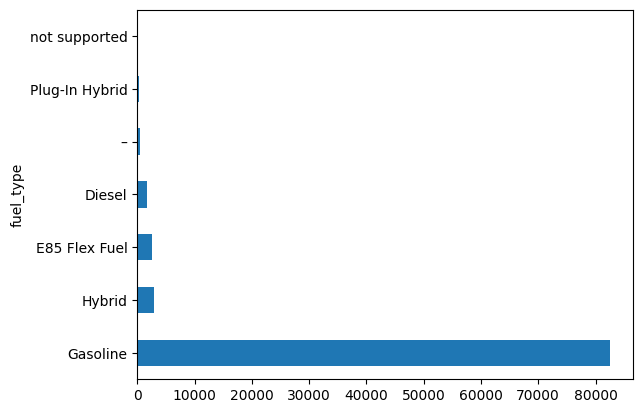

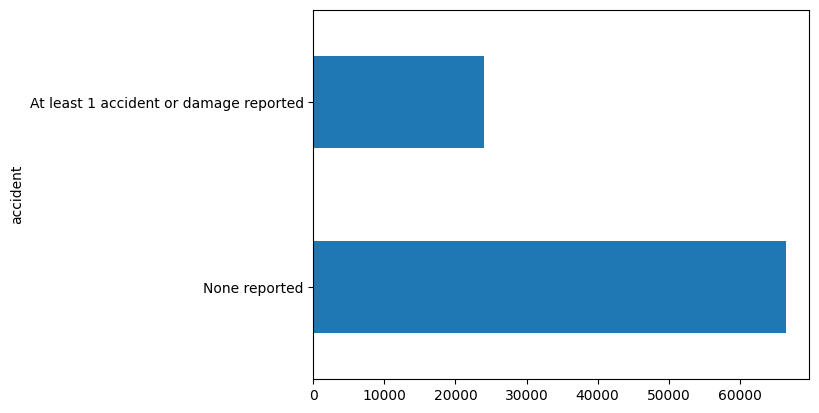

In [15]:
features_cols=['fuel_type','accident']
for i in np.arange( len(features_cols)):
    print(df[features_cols[i]].value_counts())
    fig =plt.figure()
    df[features_cols[i]].value_counts().plot.barh()

# Preprocessing
 

4. reduce/format cardinality for categorical variables i.e. `['fueltype','transmission','engine','accident']`

In [16]:
# format dtypes for org_dataset
# df['price']=df['price'].str.replace('$', '').str.replace(',', '').astype(float)
# df['milage']=df['milage'].str.replace(',','').str.replace(' mi.', '').astype(int)

In [17]:
# accident
df['accident']=df['accident'].apply(lambda x:0 if 'None' in str(x) else 1)

0


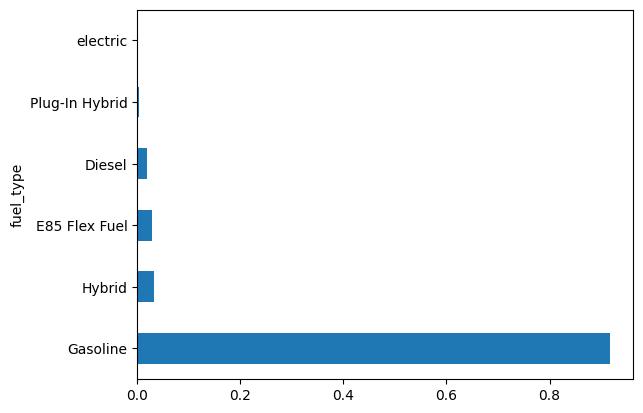

In [18]:
# clean/formate
df['fuel_type']=df['fuel_type'].apply(lambda x:
                                      np.nan if str(x).strip()=='–' else 
                                      'electric' if str(x).strip()=='not supported' else x)

features_cols=['fuel_type']
for i in np.arange( len(features_cols)):
    print(i)
    fig =plt.figure()
    df[features_cols[i]].value_counts(normalize=True).plot.barh()

In [19]:
#trannsmission
df['transmission'].value_counts().head(20)

transmission
A/T                                  28030
8-Speed A/T                          12105
Transmission w/Dual Shift Mode       10720
6-Speed A/T                           9845
6-Speed M/T                           6100
7-Speed A/T                           5631
10-Speed A/T                          3630
5-Speed A/T                           2032
8-Speed Automatic                     1928
9-Speed A/T                           1761
4-Speed A/T                           1315
5-Speed M/T                           1189
CVT Transmission                      1177
10-Speed Automatic                    1048
6-Speed Automatic                      836
Automatic                              728
M/T                                    632
9-Speed Automatic                      574
7-Speed Automatic with Auto-Shift      196
7-Speed M/T                            176
Name: count, dtype: int64

In [20]:
# trannsmission: A/T or not 
df['transmission']=df['transmission'].str.contains('A/T|Automatic',case=False).astype(int)

In [21]:
# process engine
df['engine'].value_counts().head(20)

engine
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    2338
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             1909
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             1735
285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel            1618
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             1501
340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel            1170
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel            1106
490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             1015
455.0HP 6.2L 8 Cylinder Engine Gasoline Fuel              995
425.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel     960
335.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel     960
302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel             955
295.0HP 3.5L V6 Cylinder Engine Gasoline Fuel             867
268.0HP 3.5L V6 Cylinder Engine Gasoline Fuel             810
248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel              798
2.0L I4 16V GDI DOHC Turbo                                792
3

In [22]:
# process engine
hp=df['engine'].apply(lambda x:x.split('HP')[0]).apply(pd.to_numeric,errors='coerce')
liters=df['engine'].apply(lambda x:x.split('L')[0].split('Liter')[0].split(' ')[-1]).apply(pd.to_numeric,errors='coerce')

df['hp']=hp
df['engineVolume_L']=liters


In [23]:
 df=df.drop(['model','ext_col','int_col','engine'],axis=1,errors='ignore')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90456 entries, 0 to 90455
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           90456 non-null  object 
 1   model_year      90456 non-null  int64  
 2   milage          90456 non-null  int64  
 3   fuel_type       89965 non-null  object 
 4   transmission    90456 non-null  int64  
 5   accident        90456 non-null  int64  
 6   hp              83793 non-null  float64
 7   engineVolume_L  89445 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 5.5+ MB


<b>[comments]</b>
Now, we can see, we have 11 feature column  + 1 target column. 
Next I will check the Distribution and the relationship between feature and target

In [25]:
df.nunique()

brand               55
model_year          34
milage            3477
fuel_type            6
transmission         2
accident             2
hp                 346
engineVolume_L      61
dtype: int64

fuel_type          491
engineVolume_L    1011
hp                6663
dtype: int64


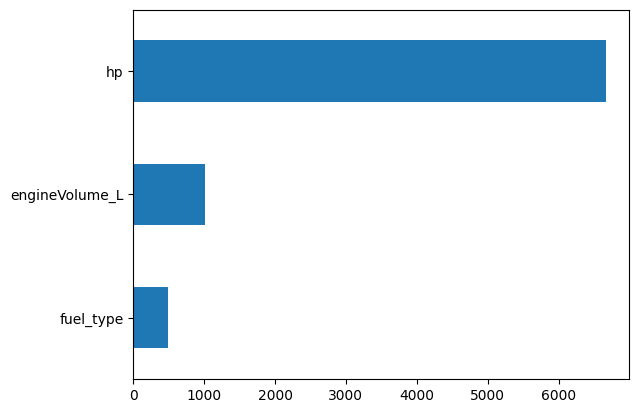

In [26]:
# check missing values
check_miss_value(df)

In [27]:
# for numerical variables
df.describe()  

model_year         milage  transmission      accident            hp  \
count  90456.000000   90456.000000  90456.000000  90456.000000  83793.000000   
mean    2015.080769   72639.410332      0.776466      0.264902    331.785447   
std        5.589065   50567.715194      0.416616      0.441284    108.520560   
min     1974.000000     100.000000      0.000000      0.000000     70.000000   
25%     2012.000000   32000.000000      1.000000      0.000000    255.000000   
50%     2016.000000   66000.000000      1.000000      0.000000    310.000000   
75%     2019.000000  102000.000000      1.000000      1.000000    400.000000   
max     2024.000000  405000.000000      1.000000      1.000000   1020.000000   

       engineVolume_L  
count    89445.000000  
mean         3.720825  
std          1.336597  
min          0.650000  
25%          3.000000  
50%          3.500000  
75%          4.600000  
max          8.400000

array([[<Axes: title={'center': 'model_year'}>,
        <Axes: title={'center': 'milage'}>],
       [<Axes: title={'center': 'transmission'}>,
        <Axes: title={'center': 'accident'}>],
       [<Axes: title={'center': 'hp'}>,
        <Axes: title={'center': 'engineVolume_L'}>]], dtype=object)

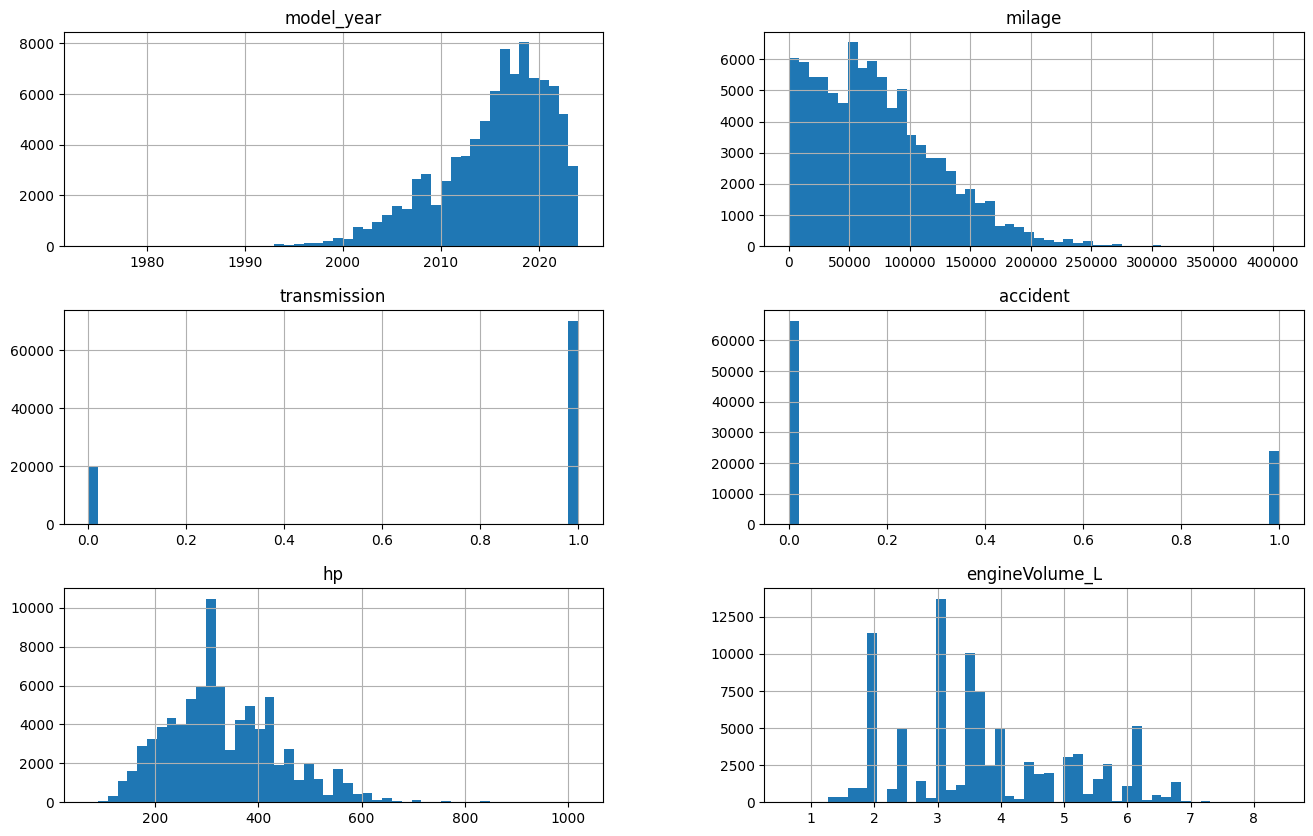

In [28]:
# for numerical variables
df.hist(figsize=(16,10),bins=50)

In [29]:
# # for cat variables
df.select_dtypes(exclude=[np.number]).describe() 

brand fuel_type
count   90456     89965
unique     55         6
top       BMW  Gasoline
freq    12223     82472

<Axes: ylabel='fuel_type'>

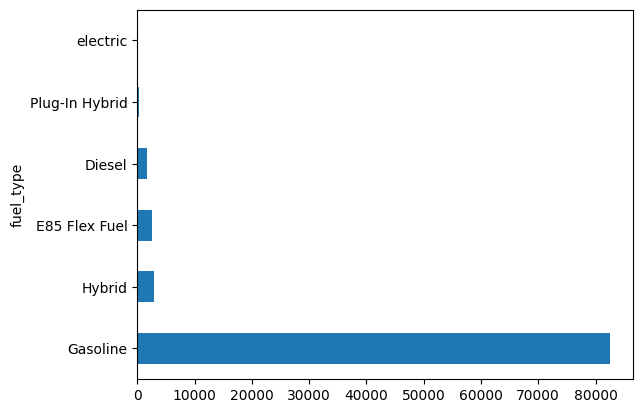

In [30]:
df['fuel_type'].value_counts().plot.barh()

In [31]:
num_features=df.select_dtypes(include=[np.number]).columns.tolist()
cat_features=df.select_dtypes(exclude=[np.number]).columns.tolist()

#  <font size='+3' color=blue> <b> Exploratory Data Analysis </b></font> 

In [32]:
df_train2=pd.concat([ df[:df_train.shape[0]],
                          pd.DataFrame({'price':y_train})],
                        axis=1)
print(df_train2.head())


     brand  model_year  milage fuel_type  transmission  accident     hp  \
0     Ford        2018   74349  Gasoline             1         0  375.0   
1      BMW        2007   80000  Gasoline             0         0  300.0   
2   Jaguar        2009   91491  Gasoline             1         0  300.0   
3      BMW        2022    2437    Hybrid             0         0  335.0   
4  Pontiac        2001  111000  Gasoline             1         0  200.0   

   engineVolume_L  price  
0             3.5  11000  
1             3.0   8250  
2             4.2  15000  
3             3.0  63500  
4             3.8   7850  


In [33]:
X_test=df[df_train.shape[0]:df_train.shape[0]+df_test.shape[0]].copy()

                    price      
                     mean count
brand                          
Bugatti      1.950995e+06     1
Ferrari      1.584043e+05    87
Lamborghini  1.447739e+05   122
Rolls-Royce  1.313651e+05   142
Aston        1.178858e+05    50
(53, 2)


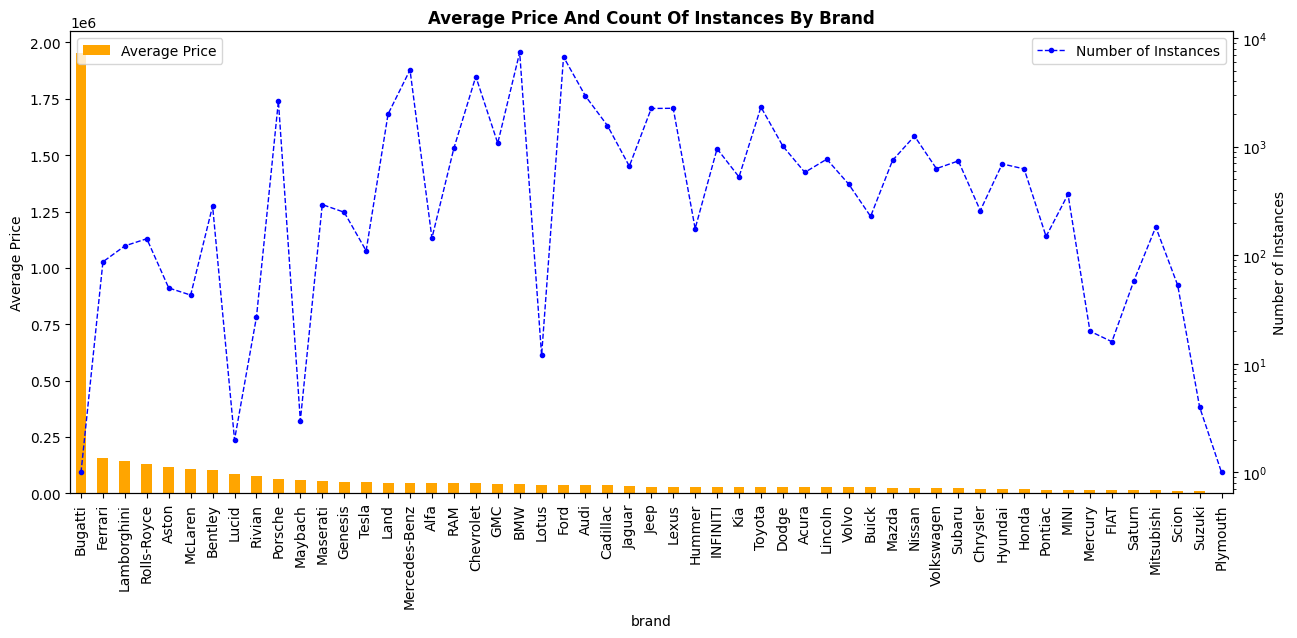

In [34]:

df=df_train2.copy()
g=df.groupby('brand').agg({'price':['mean','count']}).sort_values(('price','mean'),ascending=False)
print(g.head())
print(g.shape)

fig,ax=plt.subplots(figsize=(15,6))
ax2=ax.twinx()

g.plot.bar(ax=ax,y=('price','mean'),label='Average Price',color='orange')
g.plot.line(ax=ax2,y=('price','count'),color='blue',ls='--',lw=1,marker='.',label='Number of Instances')
#ax2.axhline(2,ls='--',color='black')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_yscale('log')
ax.set_title('Average Price And Count Of Instances By Brand',fontweight='bold')
ax.set_ylabel('Average Price')
ax2.set_ylabel('Number of Instances')
plt.show()

In [35]:
def boxDist(df,target,object_names):
    '''
    For each categorical feature, check and plot distribution of target value  and 
    enumerate them with boxplot; 
    
    Only work when object feature has limtited values
    
    args:
        df: a pd dataset inlcuding features+targe columns
        target: (str) y_name
        object_names:a list of names 
    returen:
    
    '''
    def boxplot(x,y, **kws):
        '''
        plot boxplot distribution for object features
        arg: x ,y
        '''
        sns.boxplot(x=x,y=y)
        plt.xticks(rotation=90)
    
    f=pd.melt(frame=df,id_vars=[target],value_vars=object_names)
    print(f.head())
    g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False,sharey=False)
    g=g.map(boxplot,'value',target)
    plt.show()
    
def countPlot(df,cat_names):
    '''
    For categorical features, ploting countplot for each features
    args:
        df: pd dataFrame
        cat_names: (list) of categorical features` name
    return:
        bar graph
    
    '''
    fig, axes = plt.subplots(len(cat_names),
                             figsize=(12, 3*cat_names))
    axes = axes.ravel()  # Flatten the 2D array of axes
    
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=df[column], 
                      data=df,
                      palette='bright', 
                      ax=axes[i], 
                      saturation=0.95)
        for container in axes[i].containers:
            axes[i].bar_label(container, color='black', size=10)
        axes[i].set_title(f'Count Plot of {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_ylabel('Count')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()
    
def perctDist(df,cat_names):
    '''
    For categorical features, geting the values distribution for object features
    return  percentage distribution graph for each feature
    
    inputs:
        df: pd dataset
        cat_names: a list of column names
    '''
    num_col=len(cat_names)
    for i in np.arange(num_col):
        fig,ax=plt.subplots(nrows=1,ncols=2,
                           gridspec_kw={'width_ratios': [2, 1]},
                           figsize=(20,10))
        print(cat_names[i])
        txt=100*df[cat_names[i]].value_counts()/df[cat_names[i]].value_counts().sum()
#         print(txt)
        ax[0].plot(txt,marker='*')
        ax[0].set_xlabel(cat_names[i] )
        ax[0].set_ylabel('percentage dist.')
        ax[0].set_xticks(range(len(txt.index)))
        ax[0].set_xticklabels(labels=txt.index,rotation=90)
        
        ax[1].pie(txt)
        

    plt.show()
    

def fliersOutBox(series):
    '''
    Find margnial values for each feature
    
    args:
        series: pd DatfRAME
    returns:
            the indexes of the filers
    '''
    # quantile_values q1 q2 q3
    q1,q2,q3=np.quantile(series,
                         q=[0.25, 0.5, 0.75],
                        axis=0)
#     print(quantile_values)
    iqr=q3-q1
    whisker_low=q1-1.5*iqr
    whisker_up=q3+1.5*iqr
    print(f"quantile vlaues for 0.25,0.5,0.75 is {q1,q2,q3}")
    print(f"whisker_low is {whisker_low}")
    print(f"whisker_up is {whisker_up}")
    fliers=series[((series <whisker_low )|(series >whisker_up ))]
    return(fliers.index.tolist())


In [36]:
def scatterPlot(df,num_features):
    '''
    For numerical features, plt scatter and  numer_features vs target values
    args:
        df: pd dataframe
        num_features a list of num_feature names +targe_names
    ''' 
    fig,ax=plt.subplots(len(num_features)-1,figsize=(6,5*(len(num_features)-1)))
    for i in np.arange(len(num_features)-1):
        ax[i].scatter(df[num_features[i]], df[num_features[-1]])
        ax[i].set_ylabel(num_features[-1])
        ax[i].set_xlabel(num_features[i])
def pairScatter(df,num_features):
    '''
    For numerical features, plt scatter for pais of features
    and  numer_features vs target values
    args:
        df: pd dataframe
        num_features: a list of num_feature names
    ''' 
#     fig,ax=plt.subplots(l
    sns.pairplot(df[num_features],height=2.5)

    

def boxPlot(df,num_features):
    '''
    for numerical features,  boxplotfor numer_features vs target values
    work well with limited number of values for each features
    args:
        df: pd dataframe
        num_features a list of num_feature names +targe_names
    ''' 
    fig,ax=plt.subplots(len(num_features)-1,
                          figsize=(6,5*(len(num_features)-1)))
    for i in np.arange(len(num_features)-1):
        sns.boxplot(x=df[num_features[i]],y= df[num_features[-1]])#,ax=ax[i])
#         ax[i].set_ylabel(num_features[-1])
#         ax[i].set_xlabel(num_features[i])
        
def histPlot(df,num_features):
    '''
    For numerical features, for numerical features,  
    args:
        df: pd dataframe
        num_features a list of num_feature names +targe_names
    ''' 
    fig,ax=plt.subplots(len(num_features),figsize=(6,5*(len(num_features)-1)))
    for i in np.arange(len(num_features)):
        sns.histplot(df[num_features[i]],kde='True',ax=ax[i])
#         ax[i].hist(df[num_features[i]],color='g',bins=50)
#         ax[i].set_ylabel(num_features[-1])
        ax[i].set_xlabel(num_features[i])



         model_year         milage  transmission      accident            hp  \
count  54273.000000   54273.000000  54273.000000  54273.000000  50216.000000   
mean    2015.091979   72746.175667      0.777256      0.264902    331.698323   
std        5.588909   50469.490448      0.416092      0.441285    108.053342   
min     1974.000000     100.000000      0.000000      0.000000     76.000000   
25%     2012.000000   32268.000000      1.000000      0.000000    255.000000   
50%     2016.000000   66107.000000      1.000000      0.000000    310.000000   
75%     2019.000000  102000.000000      1.000000      1.000000    400.000000   
max     2024.000000  405000.000000      1.000000      1.000000   1020.000000   

       engineVolume_L         price  
count    53667.000000  5.427300e+04  
mean         3.716928  3.921844e+04  
std          1.336200  7.282634e+04  
min          0.650000  2.000000e+03  
25%          3.000000  1.550000e+04  
50%          3.500000  2.800000e+04  
75%          

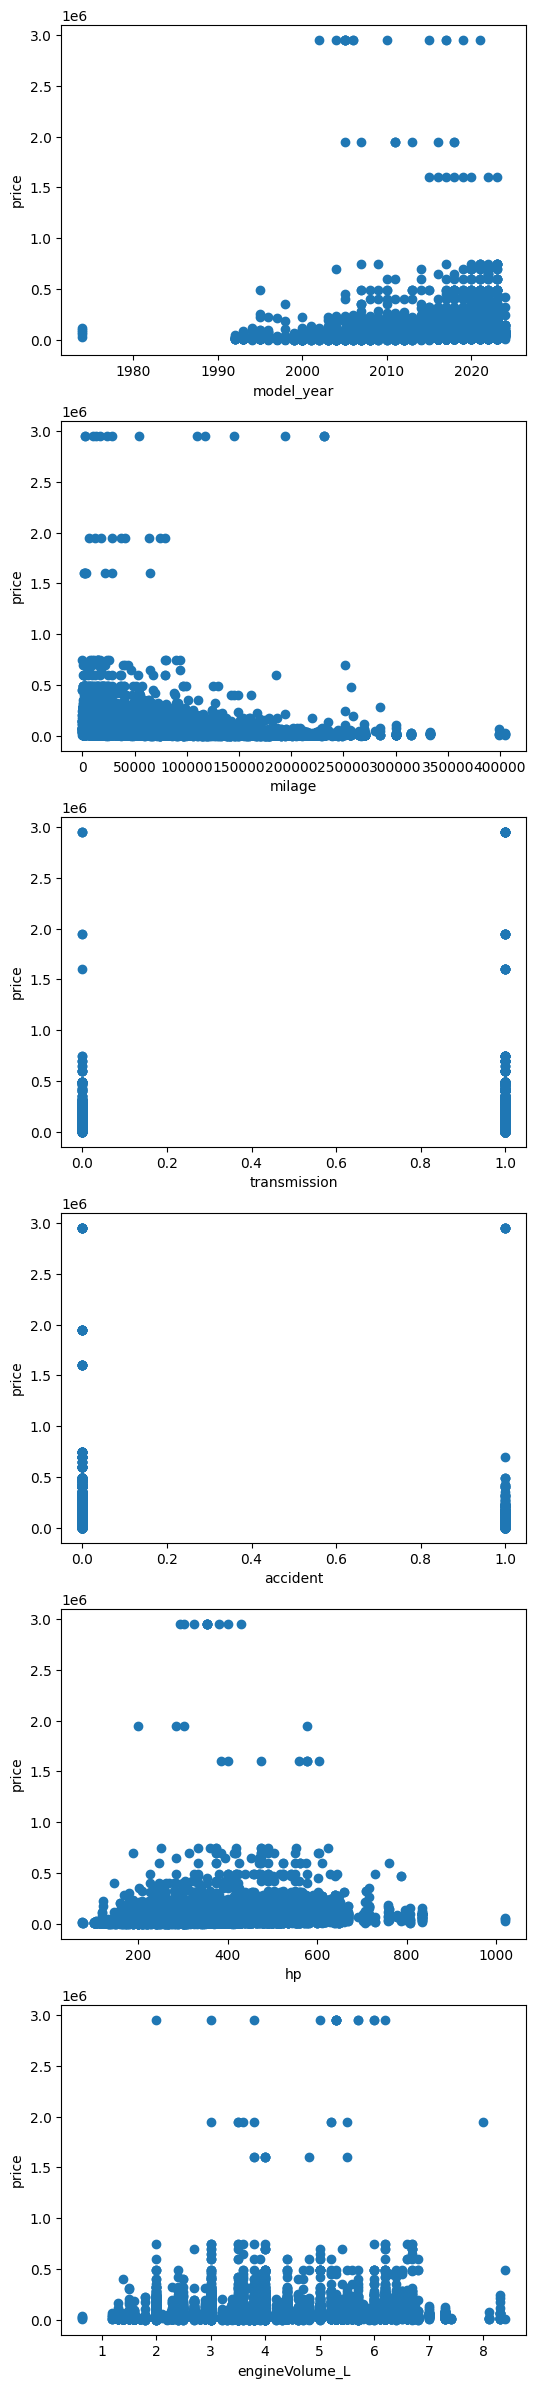

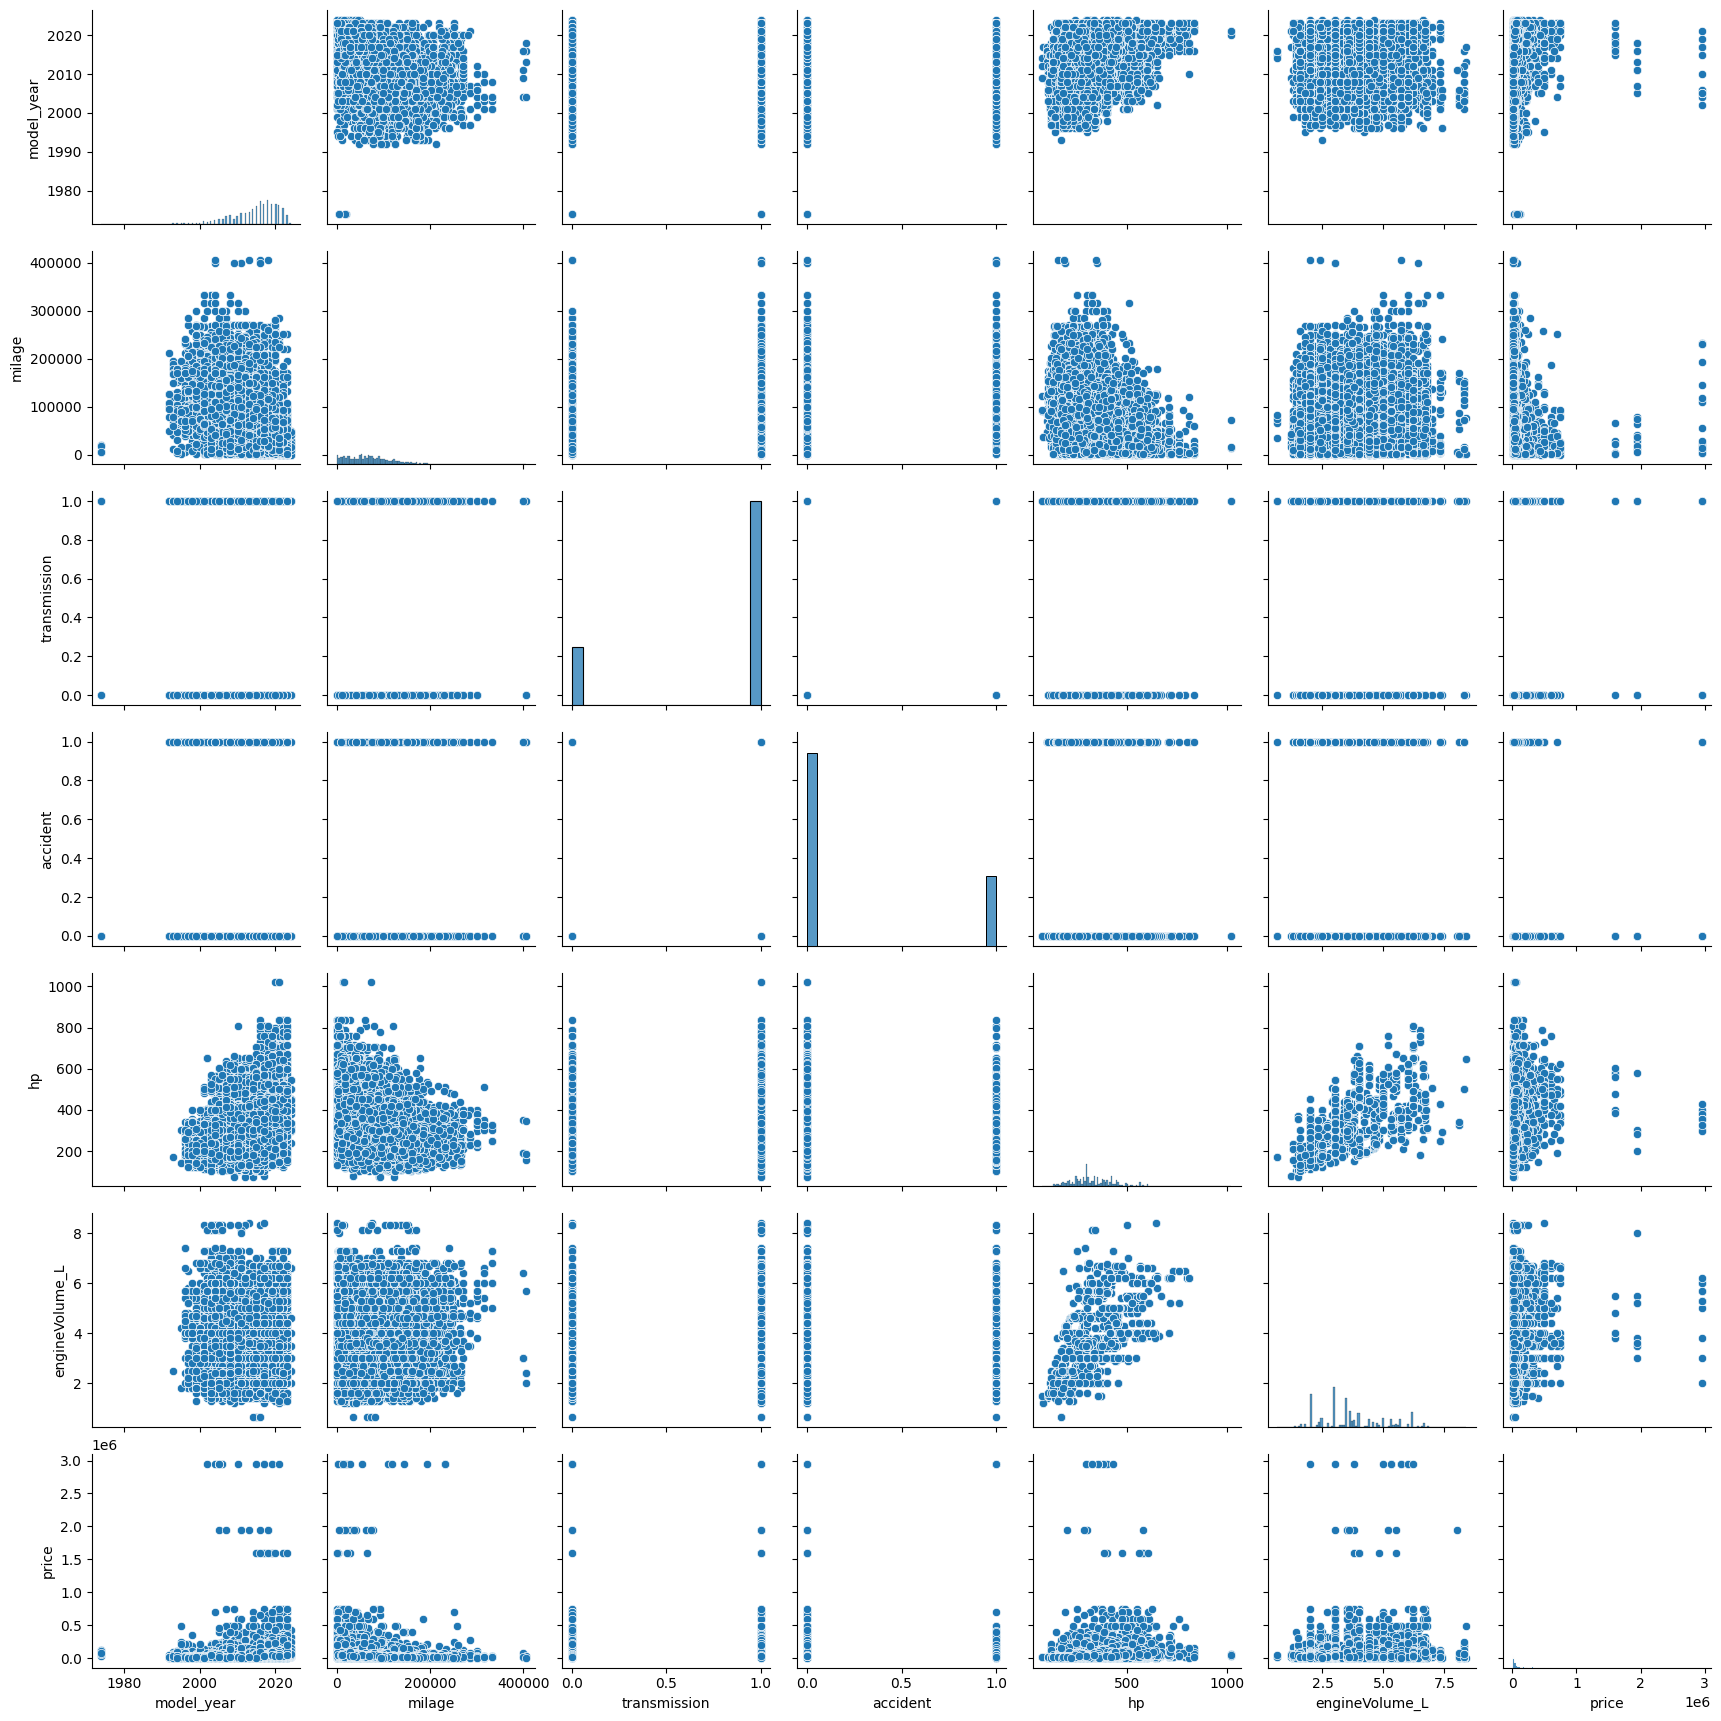

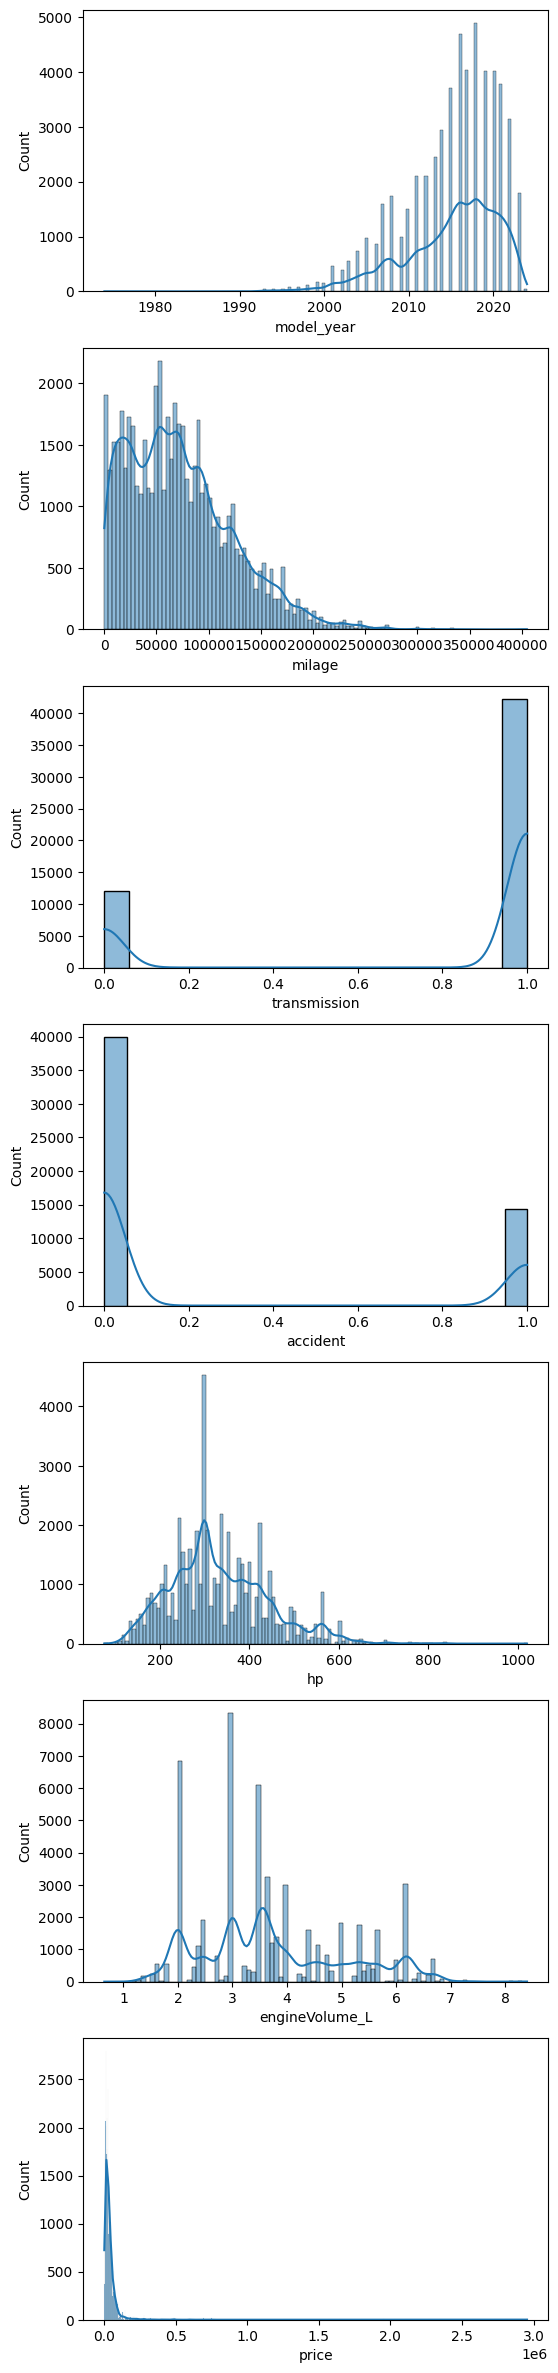

In [37]:
# check distribution for numberical features  
num_features=['model_year',
 'milage',
 'transmission',
 'accident',
 'hp',
 'engineVolume_L', 'price']

print(df[num_features].describe())

scatterPlot(df,num_features)

pairScatter(df,num_features)
histPlot(df,num_features)

<b>[comments]</b>
- margnial values:

     model_year <1980
     milage >350000
     hp>1000 
hp eng corr+


# 1.1 <font color=purple size=6> impute/drop the missing value </font>

In [38]:
from sklearn.impute import SimpleImputer

fuel_type          294
engineVolume_L     606
hp                4057
dtype: int64


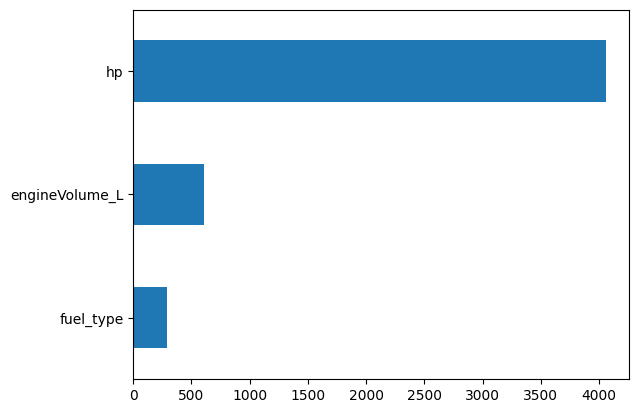

In [39]:

#-====
check_miss_value(df)

fuel_type          197
engineVolume_L     405
hp                2606
dtype: int64


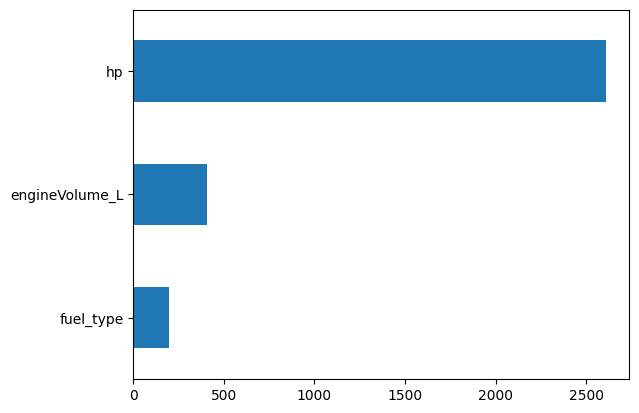

In [40]:
#==
check_miss_value(X_test)

In [41]:
df[['engineVolume_L','hp']].dtypes

engineVolume_L    float64
hp                float64
dtype: object

In [42]:
df[['engineVolume_L','hp']].nunique()

engineVolume_L     60
hp                341
dtype: int64

In [43]:
#==
imp_med=SimpleImputer(strategy='median')
imp_med.fit(df[['engineVolume_L','hp']])
imp_med.get_params()

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'keep_empty_features': False,
 'missing_values': nan,
 'strategy': 'median',
 'verbose': 'deprecated'}

fuel_type    294
dtype: int64


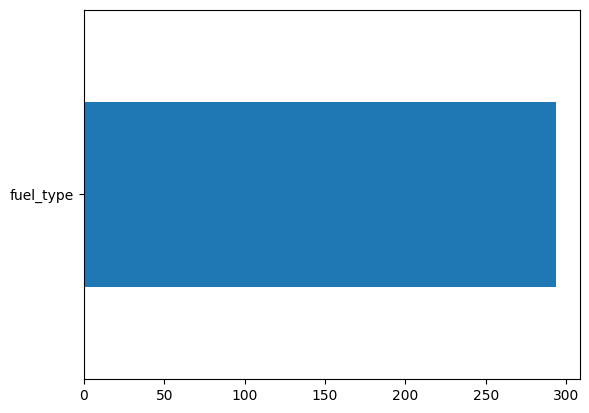

In [44]:
#===
# imp_med=SimpleImputer(strategy='median')
# imp_med.fit(df_drop[['engineVolume_L','hp']])

df[['engineVolume_L','hp']]=imp_med.transform(
    df[['engineVolume_L','hp']])
X_test[['engineVolume_L','hp']]=imp_med.transform(
    X_test[['engineVolume_L','hp']])
check_miss_value(df)


# imp_const=SimpleImputer(strategy='constant',fill_value='No')

# df_drop[['imp_clean_title']]=imp_const.fit_transform(df_drop[['clean_title']])

# imp_features=['imp_fuel_type','imp_accident','imp_clean_title']

fuel_type    197
dtype: int64


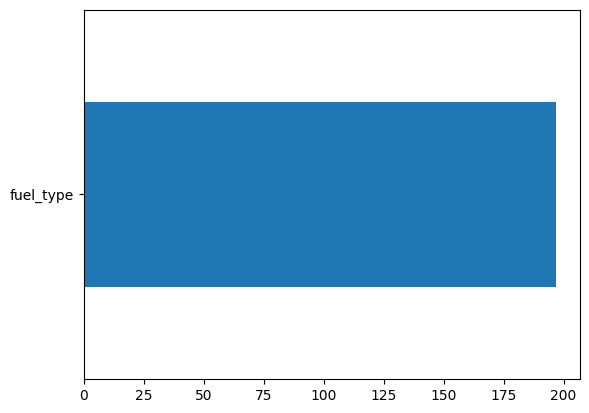

In [45]:
check_miss_value(X_test)

In [46]:
X_test['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Diesel', 'Hybrid', nan,
       'Plug-In Hybrid', 'electric'], dtype=object)

Series([], dtype: int64)
No value missing


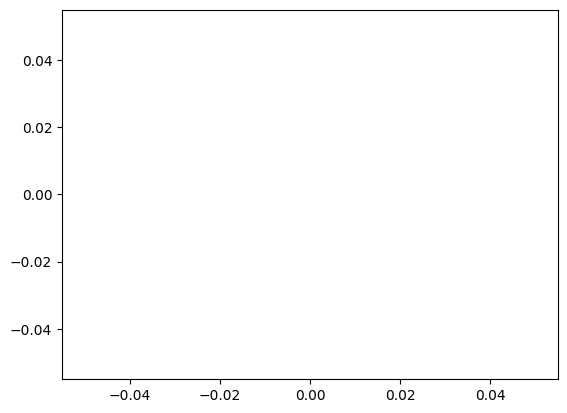

In [47]:
#===
imp_freq=SimpleImputer(strategy='most_frequent')
df[['fuel_type']]=imp_freq.fit_transform(df[['fuel_type']])
X_test[['fuel_type']]=imp_freq.fit_transform(X_test[['fuel_type']])
check_miss_value(df)


Series([], dtype: int64)
No value missing


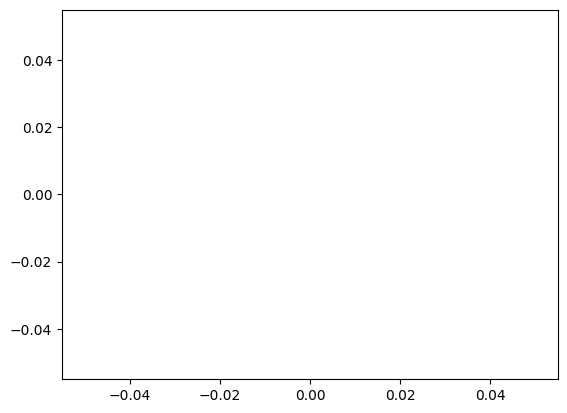

In [48]:
check_miss_value(X_test)

 # 1.2 <font size='+3' color=red> Drop  outliers (marginal values) </font>

In [49]:
df['price'].describe()

count    5.427300e+04
mean     3.921844e+04
std      7.282634e+04
min      2.000000e+03
25%      1.550000e+04
50%      2.800000e+04
75%      4.500000e+04
max      2.954083e+06
Name: price, dtype: float64

In [50]:
y_price_fliers_inx=fliersOutBox(df['price'])
print(len(y_price_fliers_inx))

quantile vlaues for 0.25,0.5,0.75 is (15500.0, 28000.0, 45000.0)
whisker_low is -28750.0
whisker_up is 89250.0
3097


The train (df_drop) size now is (54261, 9)
   price variable    value
0  11000    brand     Ford
1   8250    brand      BMW
2  15000    brand   Jaguar
3  63500    brand      BMW
4   7850    brand  Pontiac


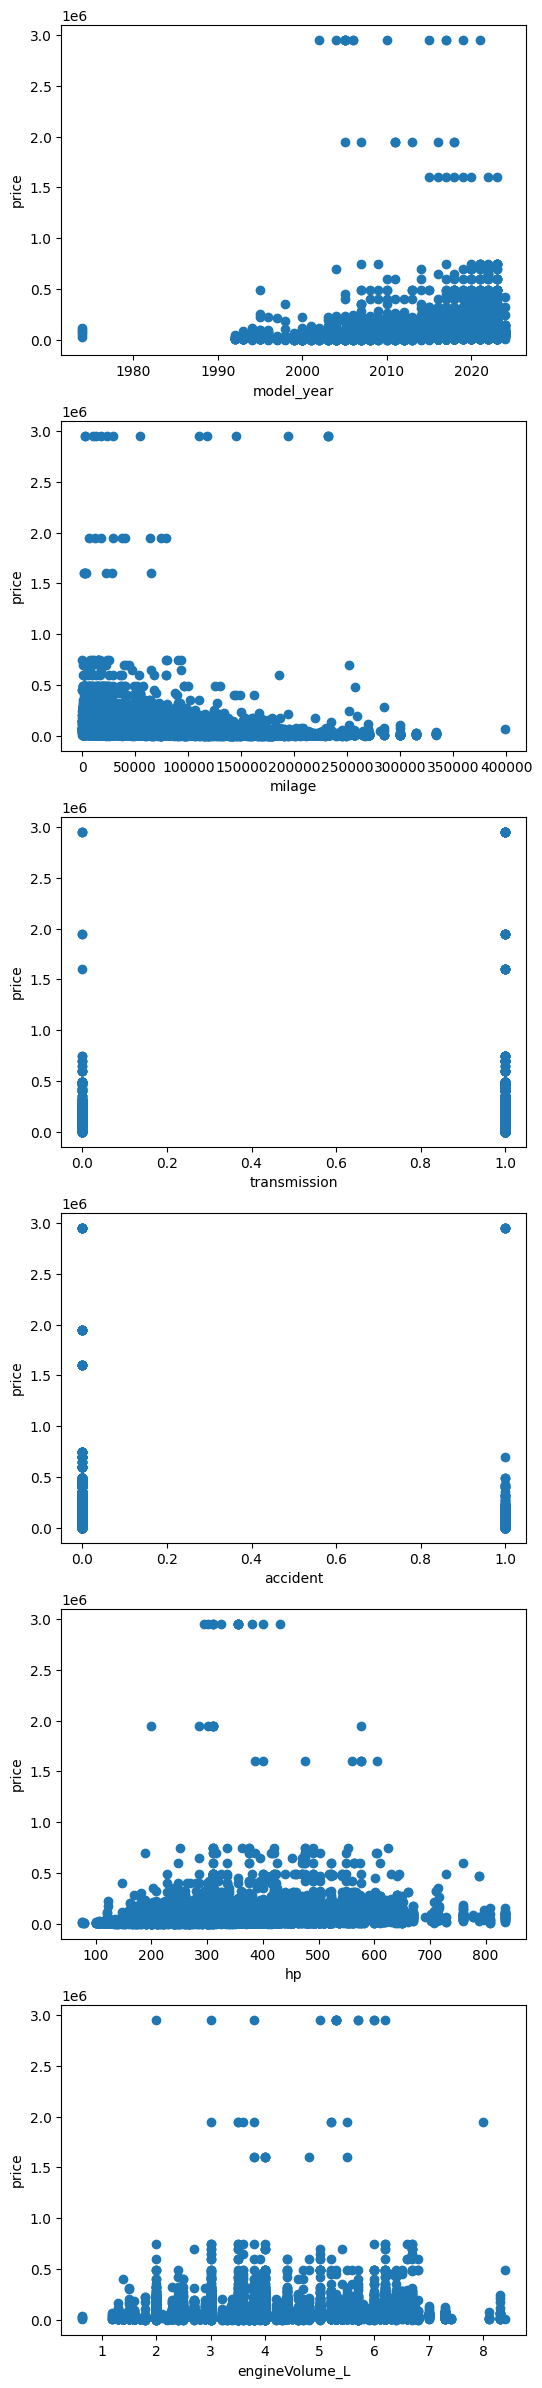

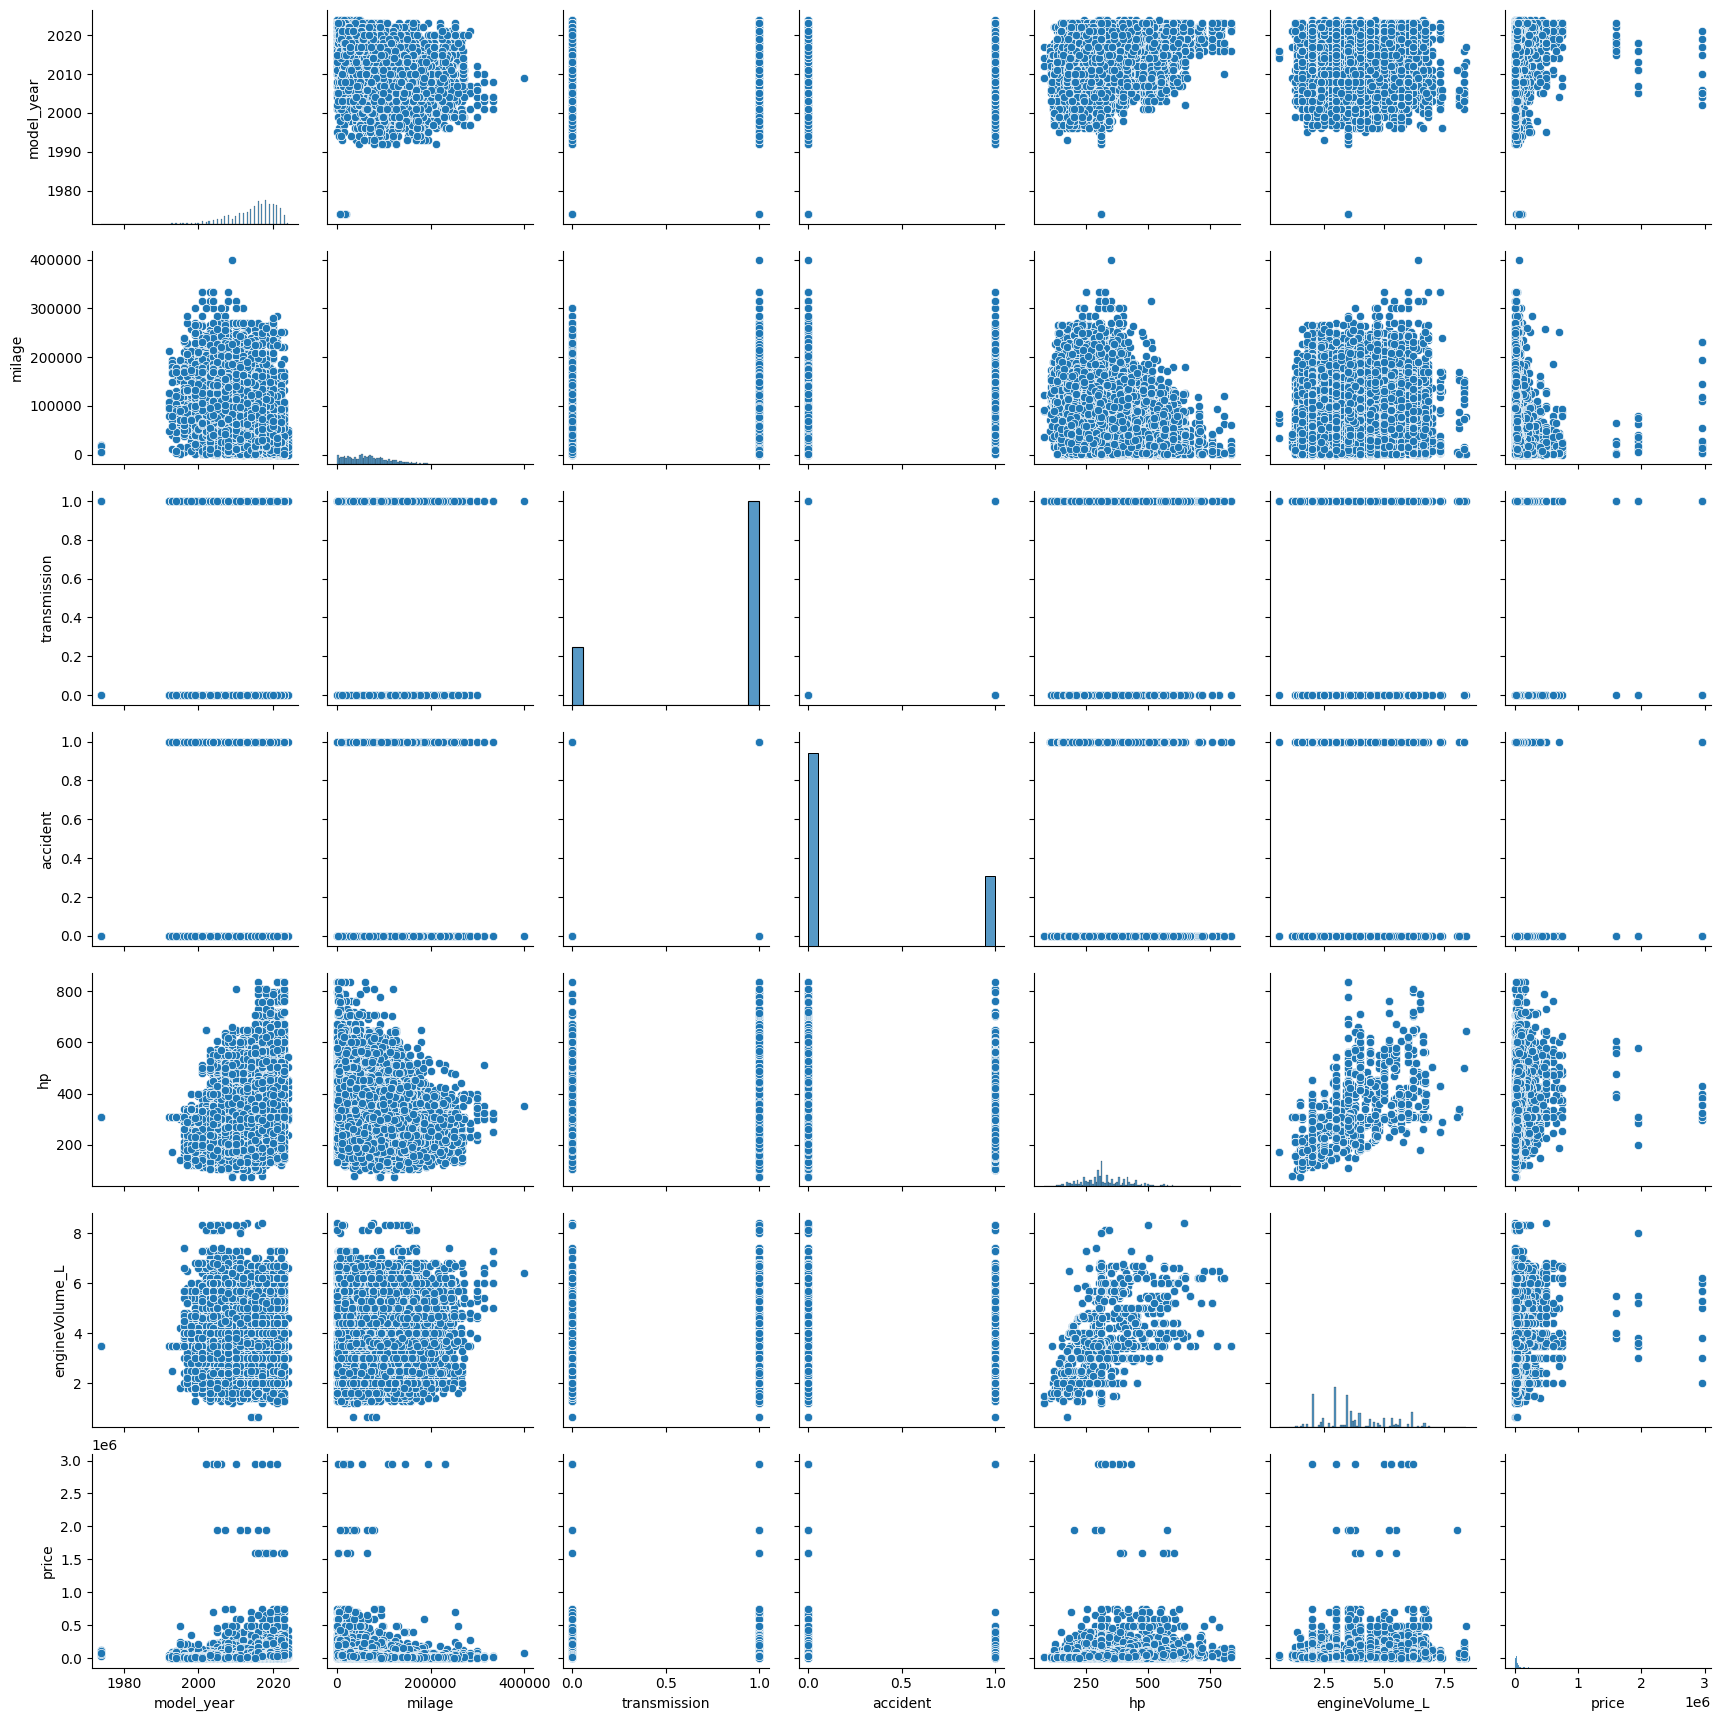

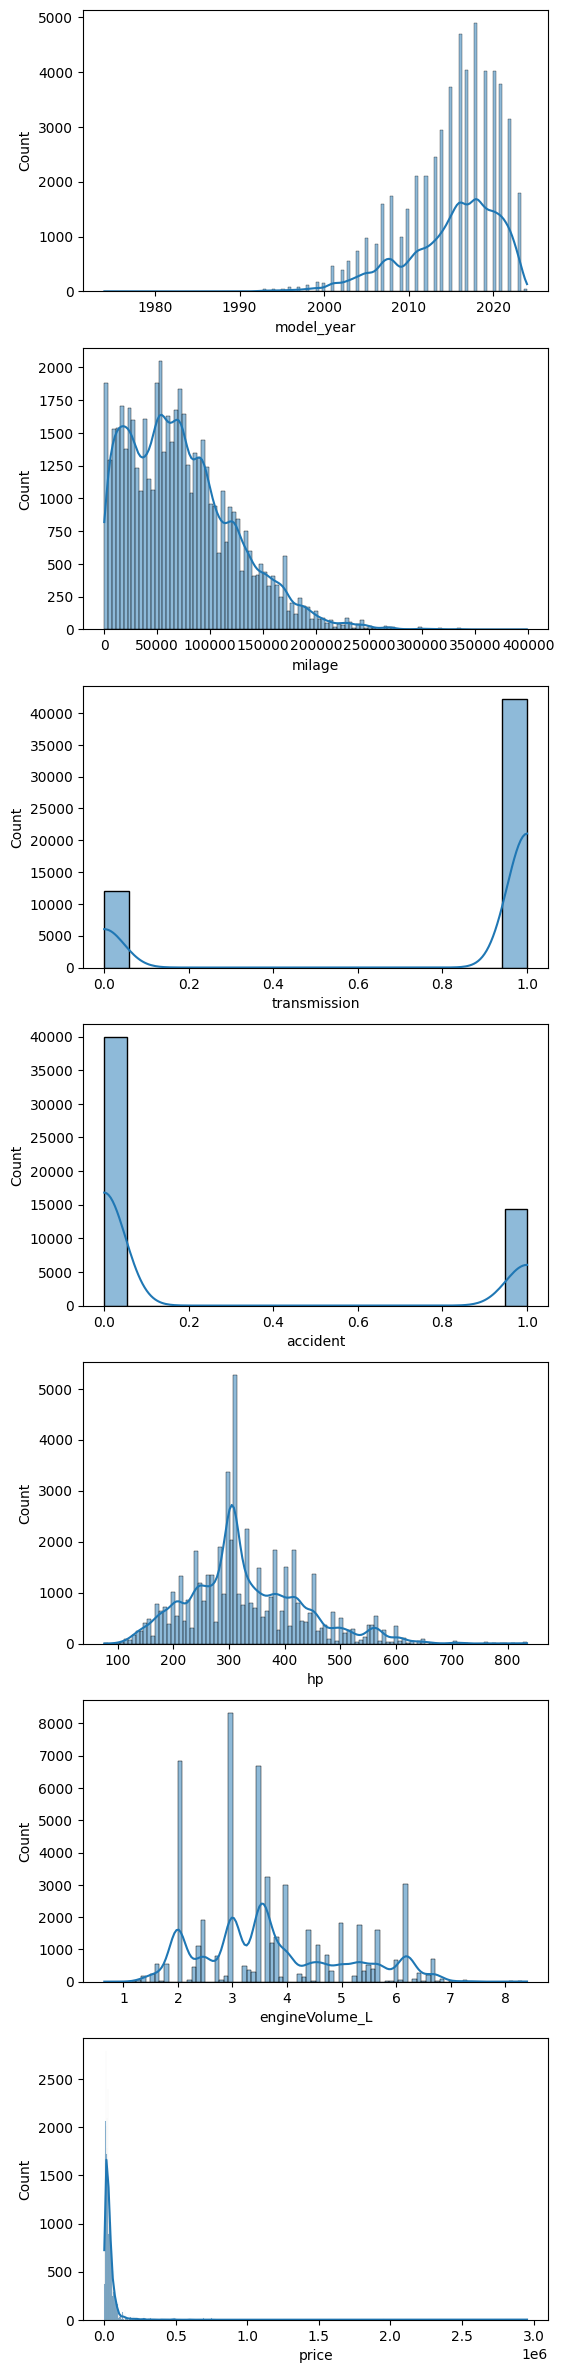

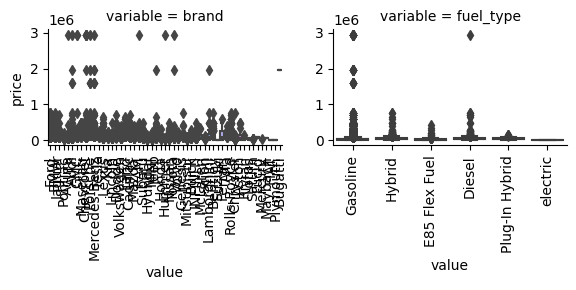

In [51]:
# drop outler the inx
inx=[693,3046,\
    40126,39640,8674,46001,42738,15749,15822,\
    34757,19882,25873]
# df=df[df.price<2e6]
df_drop=df.drop(inx,axis=0)
df_drop.reset_index(drop=True,inplace=True)
print(f"The train (df_drop) size now is {df_drop.shape}")
# df_drop.tail()
scatterPlot(df_drop,num_features)

pairScatter(df_drop,num_features)
histPlot(df_drop,num_features)
boxDist(df_drop,'price',cat_features)

In [52]:
# generally get ride of margnial values
# remove rare brand with count <2 
print(df_drop.shape)
df_drop=df_drop.groupby('brand').filter(lambda x:x['model_year'].count()>2) #remove rare brand
print(df_drop.shape)

# df.select_dtypes('O').describe()

# remove fuel_type  with count <2 
print(df_drop.shape)
df_drop=df_drop.groupby('fuel_type').filter(lambda x:x['model_year'].count()>2) #remove rare brand
print(df_drop.shape)

(54261, 9)
(54257, 9)
(54257, 9)
(54257, 9)


In [53]:
df_drop.select_dtypes('O').describe()

brand fuel_type
count   54257     54257
unique     50         6
top       BMW  Gasoline
freq     7369     49720

   price variable    value
0  11000    brand     Ford
1   8250    brand      BMW
2  15000    brand   Jaguar
3  63500    brand      BMW
4   7850    brand  Pontiac


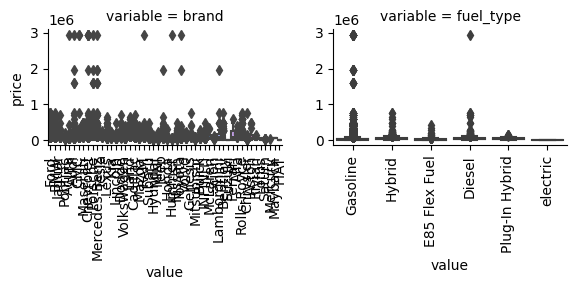

In [54]:
boxDist(df_drop,'price',cat_features)

In [55]:
num_features

['model_year',
 'milage',
 'transmission',
 'accident',
 'hp',
 'engineVolume_L',
 'price']

In [56]:
# general kick out margnial values for numerical features
# drop numerical values outside of mean+- 2std 
#Two sigmas above or below would include about 95 percent of the data,
print(df_drop.shape)
for col in num_features:
    print(col)
    num_mean=df[col].mean()
    num_std=df[col].std()
    low_bound=num_mean- 2*num_std
    up_bound=num_mean+2*num_std
    df_drop[ (df_drop[col]>low_bound) & (df_drop[col]<up_bound) ]

print(df_drop.shape)
df_drop.describe()

(54257, 9)
model_year
milage
transmission
accident
hp
engineVolume_L
price
(54257, 9)


model_year         milage  transmission      accident            hp  \
count  54257.000000   54257.000000  54257.000000  54257.000000  54257.000000   
mean    2015.092117   72710.195016      0.777245      0.264906    330.052841   
std        5.588567   50333.915551      0.416099      0.441287    103.965451   
min     1974.000000     100.000000      0.000000      0.000000     76.000000   
25%     2012.000000   32268.000000      1.000000      0.000000    261.000000   
50%     2016.000000   66075.000000      1.000000      0.000000    310.000000   
75%     2019.000000  102000.000000      1.000000      1.000000    395.000000   
max     2024.000000  399000.000000      1.000000      1.000000    835.000000   

       engineVolume_L         price  
count    54257.000000  5.425700e+04  
mean         3.714519  3.918573e+04  
std          1.328875  7.237169e+04  
min          0.650000  2.000000e+03  
25%          3.000000  1.550000e+04  
50%          3.500000  2.800000e+04  
75%          4.600000  4.500000e+04  
max          8.400000  2.954083e+06

In [57]:
df_drop.describe()

model_year         milage  transmission      accident            hp  \
count  54257.000000   54257.000000  54257.000000  54257.000000  54257.000000   
mean    2015.092117   72710.195016      0.777245      0.264906    330.052841   
std        5.588567   50333.915551      0.416099      0.441287    103.965451   
min     1974.000000     100.000000      0.000000      0.000000     76.000000   
25%     2012.000000   32268.000000      1.000000      0.000000    261.000000   
50%     2016.000000   66075.000000      1.000000      0.000000    310.000000   
75%     2019.000000  102000.000000      1.000000      1.000000    395.000000   
max     2024.000000  399000.000000      1.000000      1.000000    835.000000   

       engineVolume_L         price  
count    54257.000000  5.425700e+04  
mean         3.714519  3.918573e+04  
std          1.328875  7.237169e+04  
min          0.650000  2.000000e+03  
25%          3.000000  1.550000e+04  
50%          3.500000  2.800000e+04  
75%          4.600000  4.500000e+04  
max          8.400000  2.954083e+06

In [58]:
num_features

['model_year',
 'milage',
 'transmission',
 'accident',
 'hp',
 'engineVolume_L',
 'price']

In [59]:
num_features

['model_year',
 'milage',
 'transmission',
 'accident',
 'hp',
 'engineVolume_L',
 'price']

In [60]:
# general kick out margnial values for numerical features
# drop numerical values outside of mean+- 2std 
#Two sigmas above or below would include about 95 percent of the data,
print(df_drop.shape)
num_fearture_countin=['price']
for col in num_fearture_countin:
    print(col)
    q1,q2,q3=np.quantile(df_drop[col],[0.25,0.5,0.75])
    print( q1,q2,q3)
    iqr=q3-q1
    whisker_low=q1-1.5*iqr
    whisker_up=q3+1.5*iqr
    print(whisker_low,whisker_up)
    df_drop=df_drop[ (df_drop[col]<whisker_up) & (df_drop[col]>whisker_low) ]

print(df_drop.shape)
df_drop.describe()

(54257, 9)
price
15500.0 28000.0 45000.0
-28750.0 89250.0
(51162, 9)


model_year         milage  transmission      accident            hp  \
count  51162.000000   51162.000000  51162.000000  51162.000000  51162.000000   
mean    2014.847426   75470.543665      0.778058      0.276729    323.899261   
std        5.556477   49851.247901      0.415556      0.447386     99.717073   
min     1974.000000     100.000000      0.000000      0.000000     76.000000   
25%     2012.000000   37100.000000      1.000000      0.000000    260.000000   
50%     2016.000000   68653.000000      1.000000      0.000000    310.000000   
75%     2019.000000  105000.000000      1.000000      1.000000    382.000000   
max     2024.000000  399000.000000      1.000000      1.000000    835.000000   

       engineVolume_L         price  
count    51162.000000  51162.000000  
mean         3.686792  30252.840194  
std          1.325125  19317.902999  
min          0.650000   2000.000000  
25%          3.000000  15000.000000  
50%          3.500000  26500.000000  
75%          4.600000  41500.000000  
max          8.400000  89000.000000

In [61]:
# num_features=['model_year',
#  'milage',
#  'transmission',
#  'accident',
#  'hp',
#  'engineVolume_L', 'price']
# scatterPlot(df,num_features)

# pairScatter(df,num_features)
# histPlot(df,num_features)

# 1.3  reduce dimensionality (cardinality) for categorical values

In [62]:
df_drop.select_dtypes(exclude=[np.number]).describe()

brand fuel_type
count   51162     51162
unique     50         6
top       BMW  Gasoline
freq     6928     46887

brand
fuel_type


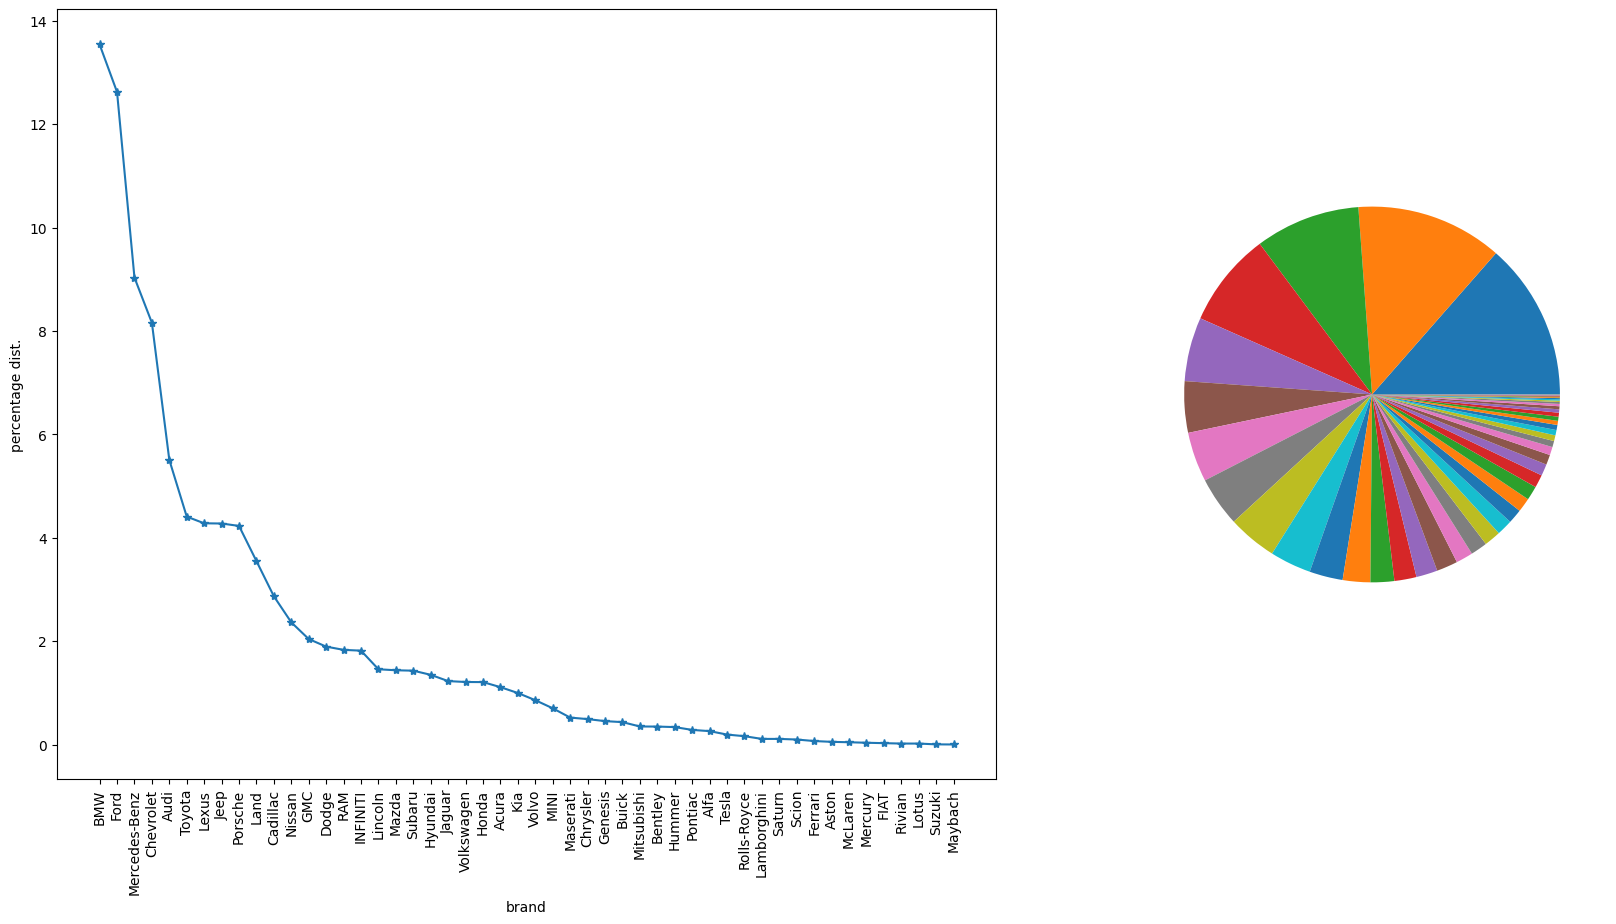

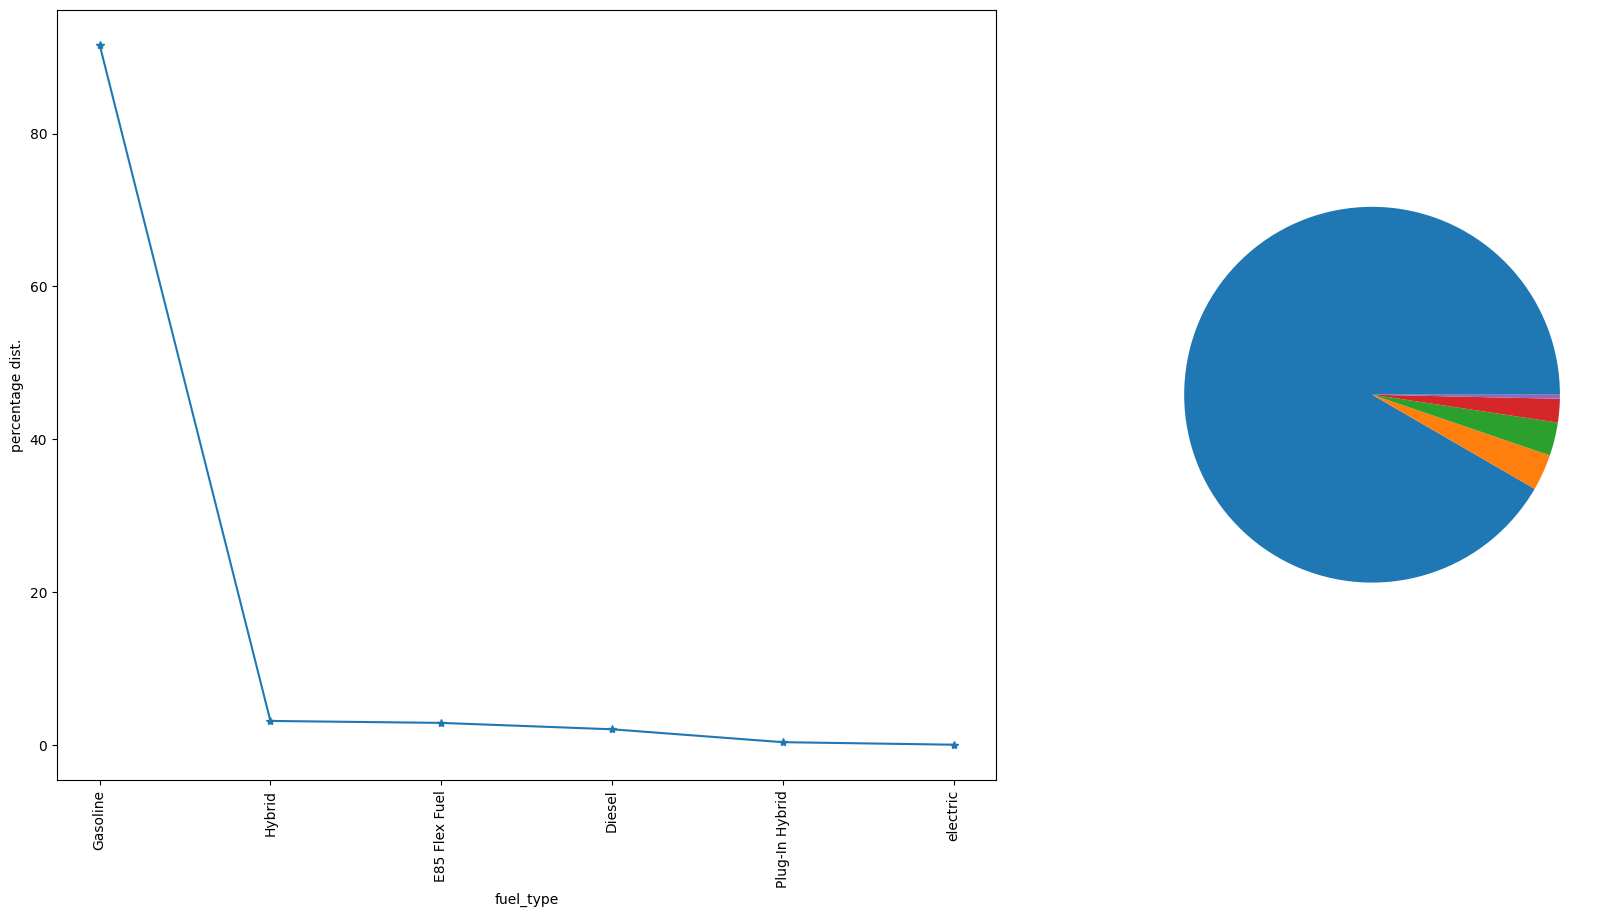

In [63]:
perctDist(df_drop,cat_features)

<b>[comments]</b>
 - model and engine will be not considerd in the following as the huge diversity of the values 

In [64]:
def groupCardinality (df,obj_names,tops):
    '''
    For high cardinality of cateogrical featuers, only kep the tops number
    individual features and group the others
    args:
        df dataframe
        obj_name: (str) the name of the feautres
        tops: (int) the number of levels treated individually
    return:
        df: dataframe with a new column named as group_obj_names
    '''
    txt=100*df[obj_names].value_counts()/df[obj_names].value_counts().sum()
    txt.sort_values(ascending=False,inplace=True)
    print('The accumutive percentage of the top {} level of {} is {:.2f}%'.format(tops,obj_names, txt[:tops].sum()))
    print('The top {} level are {}'.format( tops,txt[:tops].index.tolist()))
    print()
    
    df['group_'+obj_names]=df[obj_names].map(lambda x: x if x in txt[:tops].index.tolist() else 'Others' )

In [65]:
# groupCardinality(df_drop,'model',40)
# groupCardinality(df_drop,'engine',40)
# groupCardinality(df_drop,'ext_col',6)
# groupCardinality(df_drop,'brand',15)
# groupCardinality(df_drop,'int_col',7)
# groupCardinality(df_drop,'imp_fuel_type',1)
# groupCardinality(df_drop,'transmission',9)

# grouped_features= ['group_'+i for i in 
#                    ['model','engine',
#                     'ext_col','brand','int_col','imp_fuel_type','transmission']]

In [66]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51162 entries, 0 to 54260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           51162 non-null  object 
 1   model_year      51162 non-null  int64  
 2   milage          51162 non-null  int64  
 3   fuel_type       51162 non-null  object 
 4   transmission    51162 non-null  int64  
 5   accident        51162 non-null  int64  
 6   hp              51162 non-null  float64
 7   engineVolume_L  51162 non-null  float64
 8   price           51162 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 3.9+ MB


   price variable    value
0  11000    brand     Ford
1   8250    brand      BMW
2  15000    brand   Jaguar
3  63500    brand      BMW
4   7850    brand  Pontiac


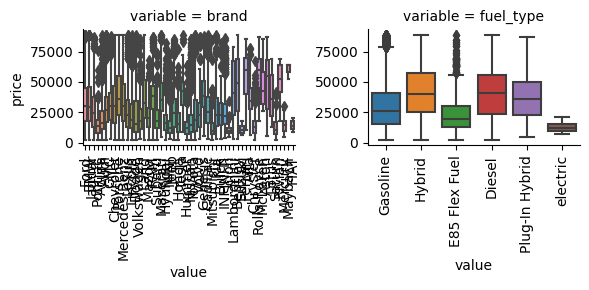

In [67]:
 
boxDist(df_drop, 'price',
         ['brand','fuel_type'])

# 1.4  Correlation analysis for numerical features

In [68]:
def spearman(df,features):
    '''
       Get correlation of numerical features with target Y values
       feature_frame=features + y_value
       args:
           df: pd dataFrame [NUM]features columns + target Y column as the last
           features: (list) of feature names
           
       return: a barh showing correlations between each fearue and y, 
               where x-axis is the correlations-value
       '''
    spr=pd.DataFrame()
    # get feature name
    spr['feature']=features
    # get correlations between each feature and y targets
    spr['spearman']=[df[f].corr(df.iloc[:,-1]) for f in features]
    spr.sort_values('spearman',inplace=True)
    
    plt.figure(  figsize=(6,0.25*len(features)))
    sns.barplot(data=spr,x='spearman',y='feature',orient='h')

def corrDist(df,yname,k=df.shape[1]):
    '''
    plt heatmap for correlations 
    args:
        df: dataFrame including num_feature+Y_target value 
        yname: the targe column name
        k: (int) the top numer of feaures which has highest correlation value with y will be plot 
        
    return:
    '''
    fig,ax=plt.subplots()
    corr=df.corr()
    cols=corr.nlargest(k,yname)[yname].index
    cm=np.corrcoef(df[cols].values.T)
    
    mask = np.zeros_like(cm, dtype = np.bool_)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(cm,cbar=True,
                annot=True,
                mask=mask,
                fmt='.2f', 
                annot_kws={'size':10},
                yticklabels=cols.values,
                xticklabels=cols.values,
           ax=ax)
    print(cm)

In [69]:
num_features=df_drop.select_dtypes( include=[np.number]).columns.tolist()
num_features

['model_year',
 'milage',
 'transmission',
 'accident',
 'hp',
 'engineVolume_L',
 'price']

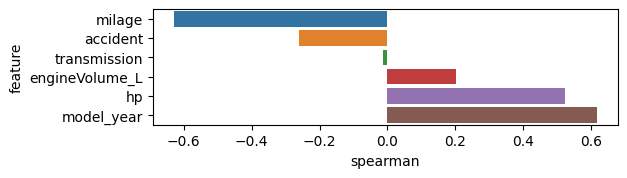

In [70]:
num_features=['model_year',
 'milage',
 'transmission',
 'accident',
 'hp',
 'engineVolume_L', 'price']
num_features2=['model_year',
 'milage',
 'transmission',
 'accident',
 'hp',
 'engineVolume_L']

spearman(df_drop[num_features],num_features2)

[[ 1.          0.61616733  0.524035    0.20281519 -0.01231989 -0.26079518
  -0.62902191]
 [ 0.61616733  1.          0.33306864 -0.02400161  0.09159665 -0.20179078
  -0.61776776]
 [ 0.524035    0.33306864  1.          0.60725543 -0.05704487 -0.15938124
  -0.35373389]
 [ 0.20281519 -0.02400161  0.60725543  1.          0.07289983 -0.04269648
   0.00395143]
 [-0.01231989  0.09159665 -0.05704487  0.07289983  1.          0.02631074
   0.05569829]
 [-0.26079518 -0.20179078 -0.15938124 -0.04269648  0.02631074  1.
   0.2799517 ]
 [-0.62902191 -0.61776776 -0.35373389  0.00395143  0.05569829  0.2799517
   1.        ]]


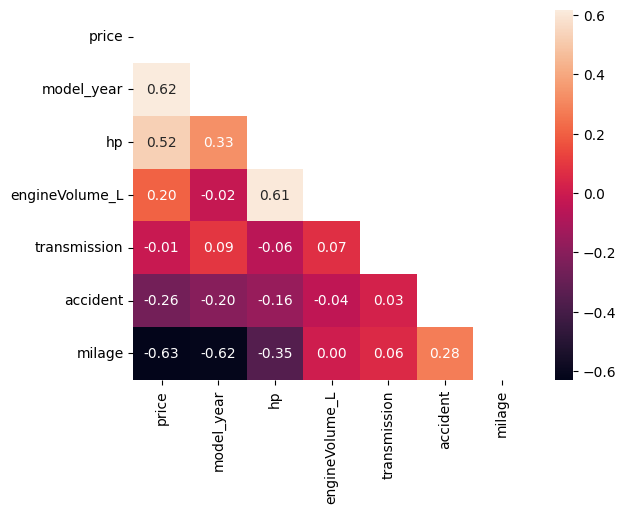

In [71]:
corrDist(df_drop[num_features]
         ,'price')

# 1.5 <font color=purple size=5> Encode categorical variables </font>

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
df_drop.select_dtypes(exclude=[np.number]).columns.tolist()

['brand', 'fuel_type']

In [74]:
df_drop.shape

(51162, 9)

In [75]:
df_drop.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [76]:
df_drop.index

RangeIndex(start=0, stop=51162, step=1)

In [77]:
X_test.shape

(36183, 8)

In [78]:
X_test.index

RangeIndex(start=0, stop=36183, step=1)

In [79]:
oh_enc=OneHotEncoder()
cat_names=['brand', 'fuel_type']
oh_fit=oh_enc.fit(df_drop[cat_names])

oh_features_in=oh_fit.feature_names_in_
oh_features=oh_fit.get_feature_names_out().tolist()

oh_return=oh_fit.transform(df_drop[cat_names]).toarray()
print(oh_return.shape)
print(f"the orignial {oh_fit.n_features_in_} \
has been to {len(oh_features)} features")

(51162, 56)
the orignial 2 has been to 56 features


In [80]:
oh_features_df=pd.DataFrame(oh_return,columns=oh_features)
df_drop=pd.concat([df_drop,oh_features_df], 
          axis=1)
df_drop.drop(columns=['brand', 'fuel_type'],inplace=True)

In [81]:
df_drop.head()

model_year  milage  transmission  accident     hp  engineVolume_L  price  \
0        2018   74349             1         0  375.0             3.5  11000   
1        2007   80000             0         0  300.0             3.0   8250   
2        2009   91491             1         0  300.0             4.2  15000   
3        2022    2437             0         0  335.0             3.0  63500   
4        2001  111000             1         0  200.0             3.8   7850   

   brand_Acura  brand_Alfa  brand_Aston  ...  brand_Tesla  brand_Toyota  \
0          0.0         0.0          0.0  ...          0.0           0.0   
1          0.0         0.0          0.0  ...          0.0           0.0   
2          0.0         0.0          0.0  ...          0.0           0.0   
3          0.0         0.0          0.0  ...          0.0           0.0   
4          0.0         0.0          0.0  ...          0.0           0.0   

   brand_Volkswagen  brand_Volvo  fuel_type_Diesel  fuel_type_E85 Flex Fuel  \
0               0.0          0.0               0.0                      0.0   
1               0.0          0.0               0.0                      0.0   
2               0.0          0.0               0.0                      0.0   
3               0.0          0.0               0.0                      0.0   
4               0.0          0.0               0.0                      0.0   

   fuel_type_Gasoline  fuel_type_Hybrid  fuel_type_Plug-In Hybrid  \
0                 1.0               0.0                       0.0   
1                 1.0               0.0                       0.0   
2                 1.0               0.0                       0.0   
3                 0.0               1.0                       0.0   
4                 1.0               0.0                       0.0   

   fuel_type_electric  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 63 columns]

Series([], dtype: int64)
No value missing


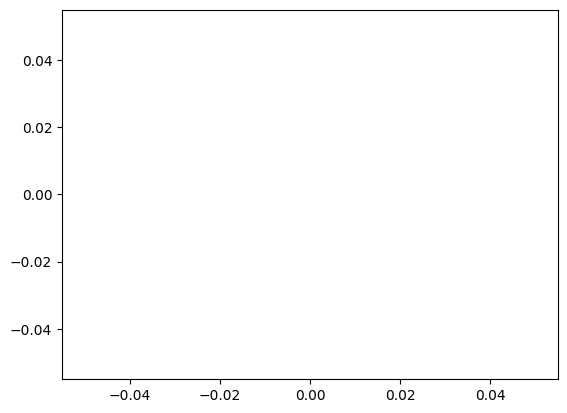

In [82]:
check_miss_value(df_drop)

In [83]:
# for test
oh_enc_test=OneHotEncoder()
cat_names=['brand', 'fuel_type']
oh_fit_test=oh_enc.fit(X_test[cat_names])
oh_features_in_test=oh_fit_test.feature_names_in_
oh_features_test=oh_fit_test.get_feature_names_out().tolist()

oh_return_test=oh_fit_test.transform(X_test[cat_names]).toarray()
# oh_return.shape
print(f"the orignial {oh_fit_test.n_features_in_} \
has been to {len(oh_features_test)} features")

the orignial 2 has been to 59 features


In [84]:
oh_features_df_test=pd.DataFrame(oh_return_test,columns=oh_features_test)
X_test=pd.concat([X_test,oh_features_df_test], 
          axis=1)

X_test.drop(columns=['brand', 'fuel_type'],inplace=True)

Series([], dtype: int64)
No value missing


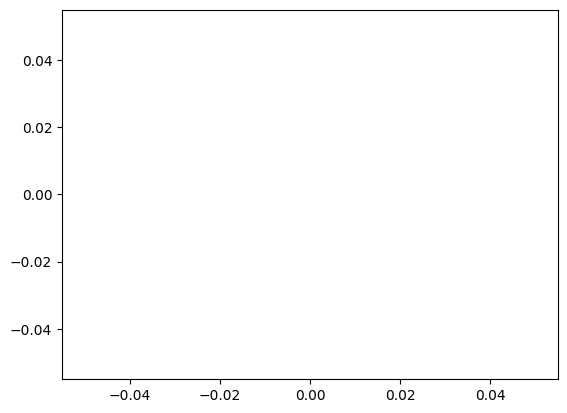

In [85]:
check_miss_value(X_test)

# <font color=purple size=5> Split datasets </font>

no spliting 

In [86]:
df_drop.head()

model_year  milage  transmission  accident     hp  engineVolume_L  price  \
0        2018   74349             1         0  375.0             3.5  11000   
1        2007   80000             0         0  300.0             3.0   8250   
2        2009   91491             1         0  300.0             4.2  15000   
3        2022    2437             0         0  335.0             3.0  63500   
4        2001  111000             1         0  200.0             3.8   7850   

   brand_Acura  brand_Alfa  brand_Aston  ...  brand_Tesla  brand_Toyota  \
0          0.0         0.0          0.0  ...          0.0           0.0   
1          0.0         0.0          0.0  ...          0.0           0.0   
2          0.0         0.0          0.0  ...          0.0           0.0   
3          0.0         0.0          0.0  ...          0.0           0.0   
4          0.0         0.0          0.0  ...          0.0           0.0   

   brand_Volkswagen  brand_Volvo  fuel_type_Diesel  fuel_type_E85 Flex Fuel  \
0               0.0          0.0               0.0                      0.0   
1               0.0          0.0               0.0                      0.0   
2               0.0          0.0               0.0                      0.0   
3               0.0          0.0               0.0                      0.0   
4               0.0          0.0               0.0                      0.0   

   fuel_type_Gasoline  fuel_type_Hybrid  fuel_type_Plug-In Hybrid  \
0                 1.0               0.0                       0.0   
1                 1.0               0.0                       0.0   
2                 1.0               0.0                       0.0   
3                 0.0               1.0                       0.0   
4                 1.0               0.0                       0.0   

   fuel_type_electric  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 63 columns]

# 1.6 Splitting dataset( no spltting)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
y_train=df_drop['price']
X_train=df_drop.drop(['price'],axis=1)
print(f"The X_training size is {X_train.shape} and y_train is {y_train.shape}")


The X_training size is (51162, 62) and y_train is (51162,)


In [89]:
# X_train,X_test,y_train,y_test=train_test_split(X, y,
#                                                      test_size=0.2,
#                                                      random_state=33,
#                                                     shuffle=True)
# # X_train,X_dev, y_train,y_dev=train_test_split(X_traindev,y_traindev,
# #                                                      test_size=0.2,
# #                                                      random_state=33,
# #                                                     shuffle=True)

# print(f"The X_training size is {X_train.shape} and y_train is {y_train.shape}")
# # print(f"The X_dev size is {X_dev.shape} and y_train is {y_dev.shape}")
# print(f"The X_test size is {X_test.shape} and y_train is {y_test.shape}")

# <font color=green size=5> Transformation/Scaling for numerical features [training dataset] <font>

In [90]:
# convert an existing Python function into a transformer 
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import skew

In [91]:

def boxPlot(df,num_features):
    '''
    for numerical features,  boxplotfor numer_features vs target values
    work well with limited number of values for each features
    args:
        df: pd dataframe
        num_features a list of num_feature names +targe_names
    ''' 
    fig,ax=plt.subplots(len(num_features)-1,
                          figsize=(6,5*(len(num_features)-1)))
    for i in np.arange(len(num_features)-1):
        sns.boxplot(x=df[num_features[i]],y= df[num_features[-1]])#,ax=ax[i])
#         ax[i].set_ylabel(num_features[-1])
#         ax[i].set_xlabel(num_features[i])
        
def histDist(X_set,num_features):
    '''
    for numerical features,ploting hisgradm
    args:
        X_set: pd dataframe
        num_features a list of num_feature names
    ''' 
    fig,ax=plt.subplots(len(num_features),figsize=(6,5*(len(num_features))))
    for i in np.arange(len(num_features)):
        print(num_features[i])
        sns.histplot(df[num_features[i]],kde='True',ax=ax[i])
#         ax[i].hist(df[num_features[i]],color='g',bins=50)
#         ax[i].set_ylabel(num_features[-1])
        ax[i].set_xlabel(num_features[i])


In [92]:

def histDistY(y,yname):
    '''
    for numerical features,ploting hisgradm and 
    args:
        y: a pd.series
        yname (str)  names
    ''' 
    fig,ax=plt.subplots(1,2,figsize=(14,6))

    sns.histplot(y ,
                 kde='True',
                 stat='probability'
                 ,ax=ax[0])
    
    ax[0].set_xlabel(yname)
    stats.probplot(y,plot=ax[1])

In [93]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer,MinMaxScaler,StandardScaler
from scipy import stats
from scipy.stats import boxcox, yeojohnson

The skewness :0.8728413631139784


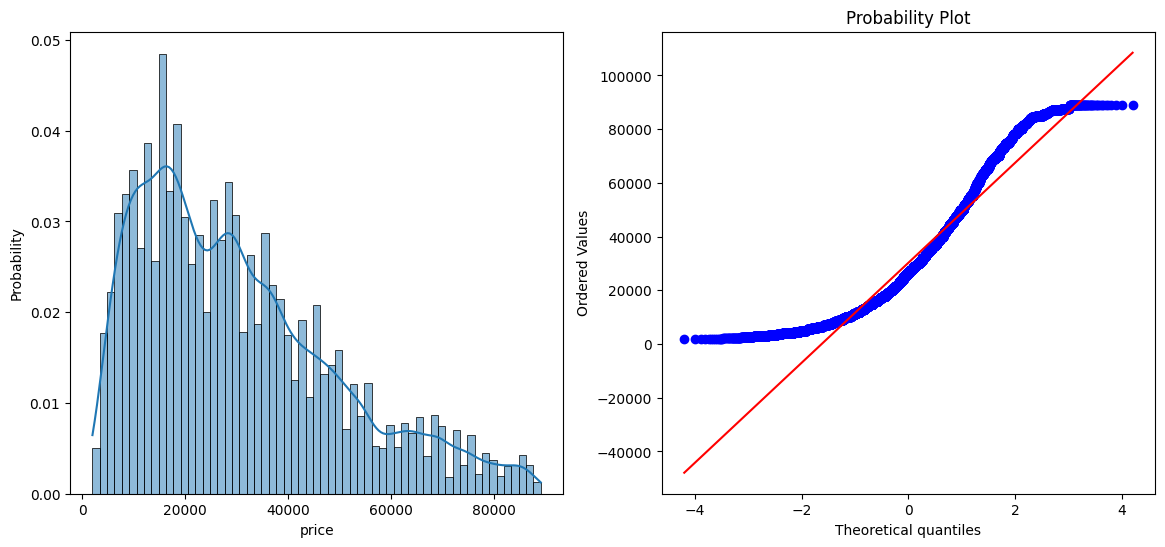

In [94]:
print(f"The skewness :{y_train.skew()}")
histDistY(y_train, 'price')

The skewness after log transformation :-0.481754026566982


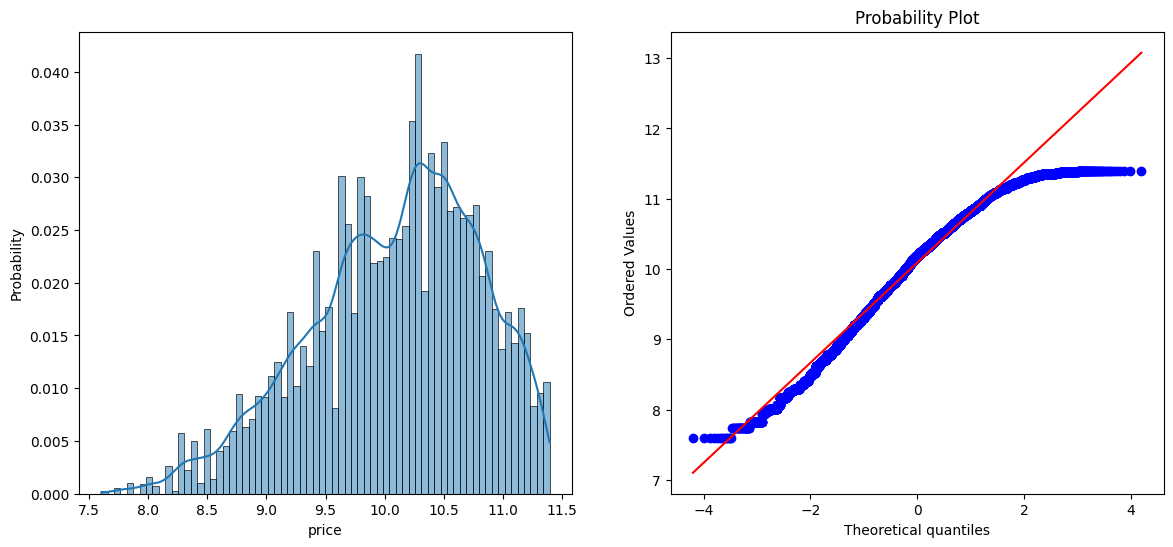

In [95]:
# y_train_log=y_train.map(np.log)
log_trans = FunctionTransformer(func=np.log, 
                                validate=True,
                               inverse_func=np.exp)

# log_trans.fit(pd.DataFrame(y_train))
y_train_log=log_trans.transform(pd.DataFrame(y_train))
y_train_log=np.squeeze(y_train_log)
 
print(f"The skewness after log transformation :{skew(y_train_log)}")
histDistY(pd.Series(y_train_log), 'price')

In [96]:
num_features2

['model_year', 'milage', 'transmission', 'accident', 'hp', 'engineVolume_L']

The skewness :-0.9124221520308509
The skewness :0.8104637338342222
The skewness :0.6531862467304815
The skewness :0.5485247319474349
model_year
milage
hp
engineVolume_L


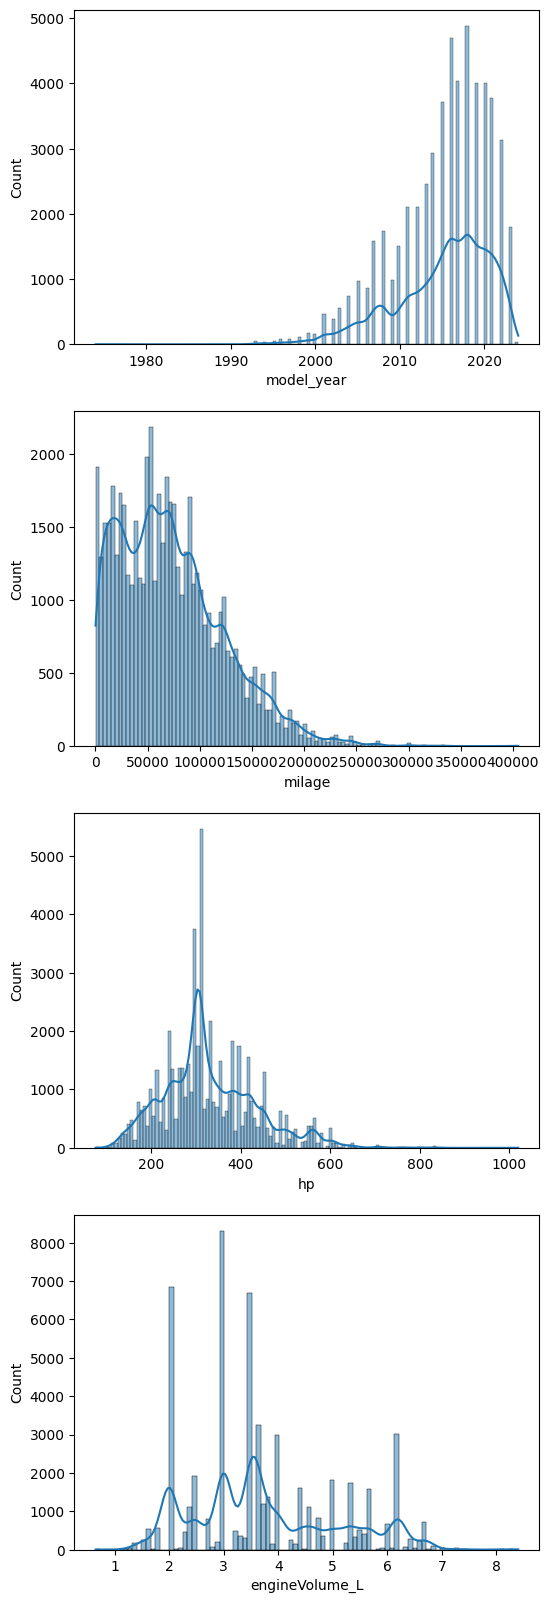

In [97]:

print(f"The skewness :{X_train['model_year'].skew()}")
print(f"The skewness :{X_train['milage'].skew()}")
print(f"The skewness :{X_train['hp'].skew()}")
print(f"The skewness :{X_train['engineVolume_L'].skew()}")

histDist(X_train,['model_year','milage','hp','engineVolume_L'])

The skewness :0.8104637338342222
The skewness :-0.11497831003330658


((array([-4.19659328, -3.99108752, -3.87905688, ...,  3.87905688,
          3.99108752,  4.19659328]),
  array([ 10.        ,  10.        ,  10.24695077, ..., 577.37422873,
         577.37422873, 631.66446789])),
 (95.91027967279165, 257.3514299465453, 0.9976437700327151))

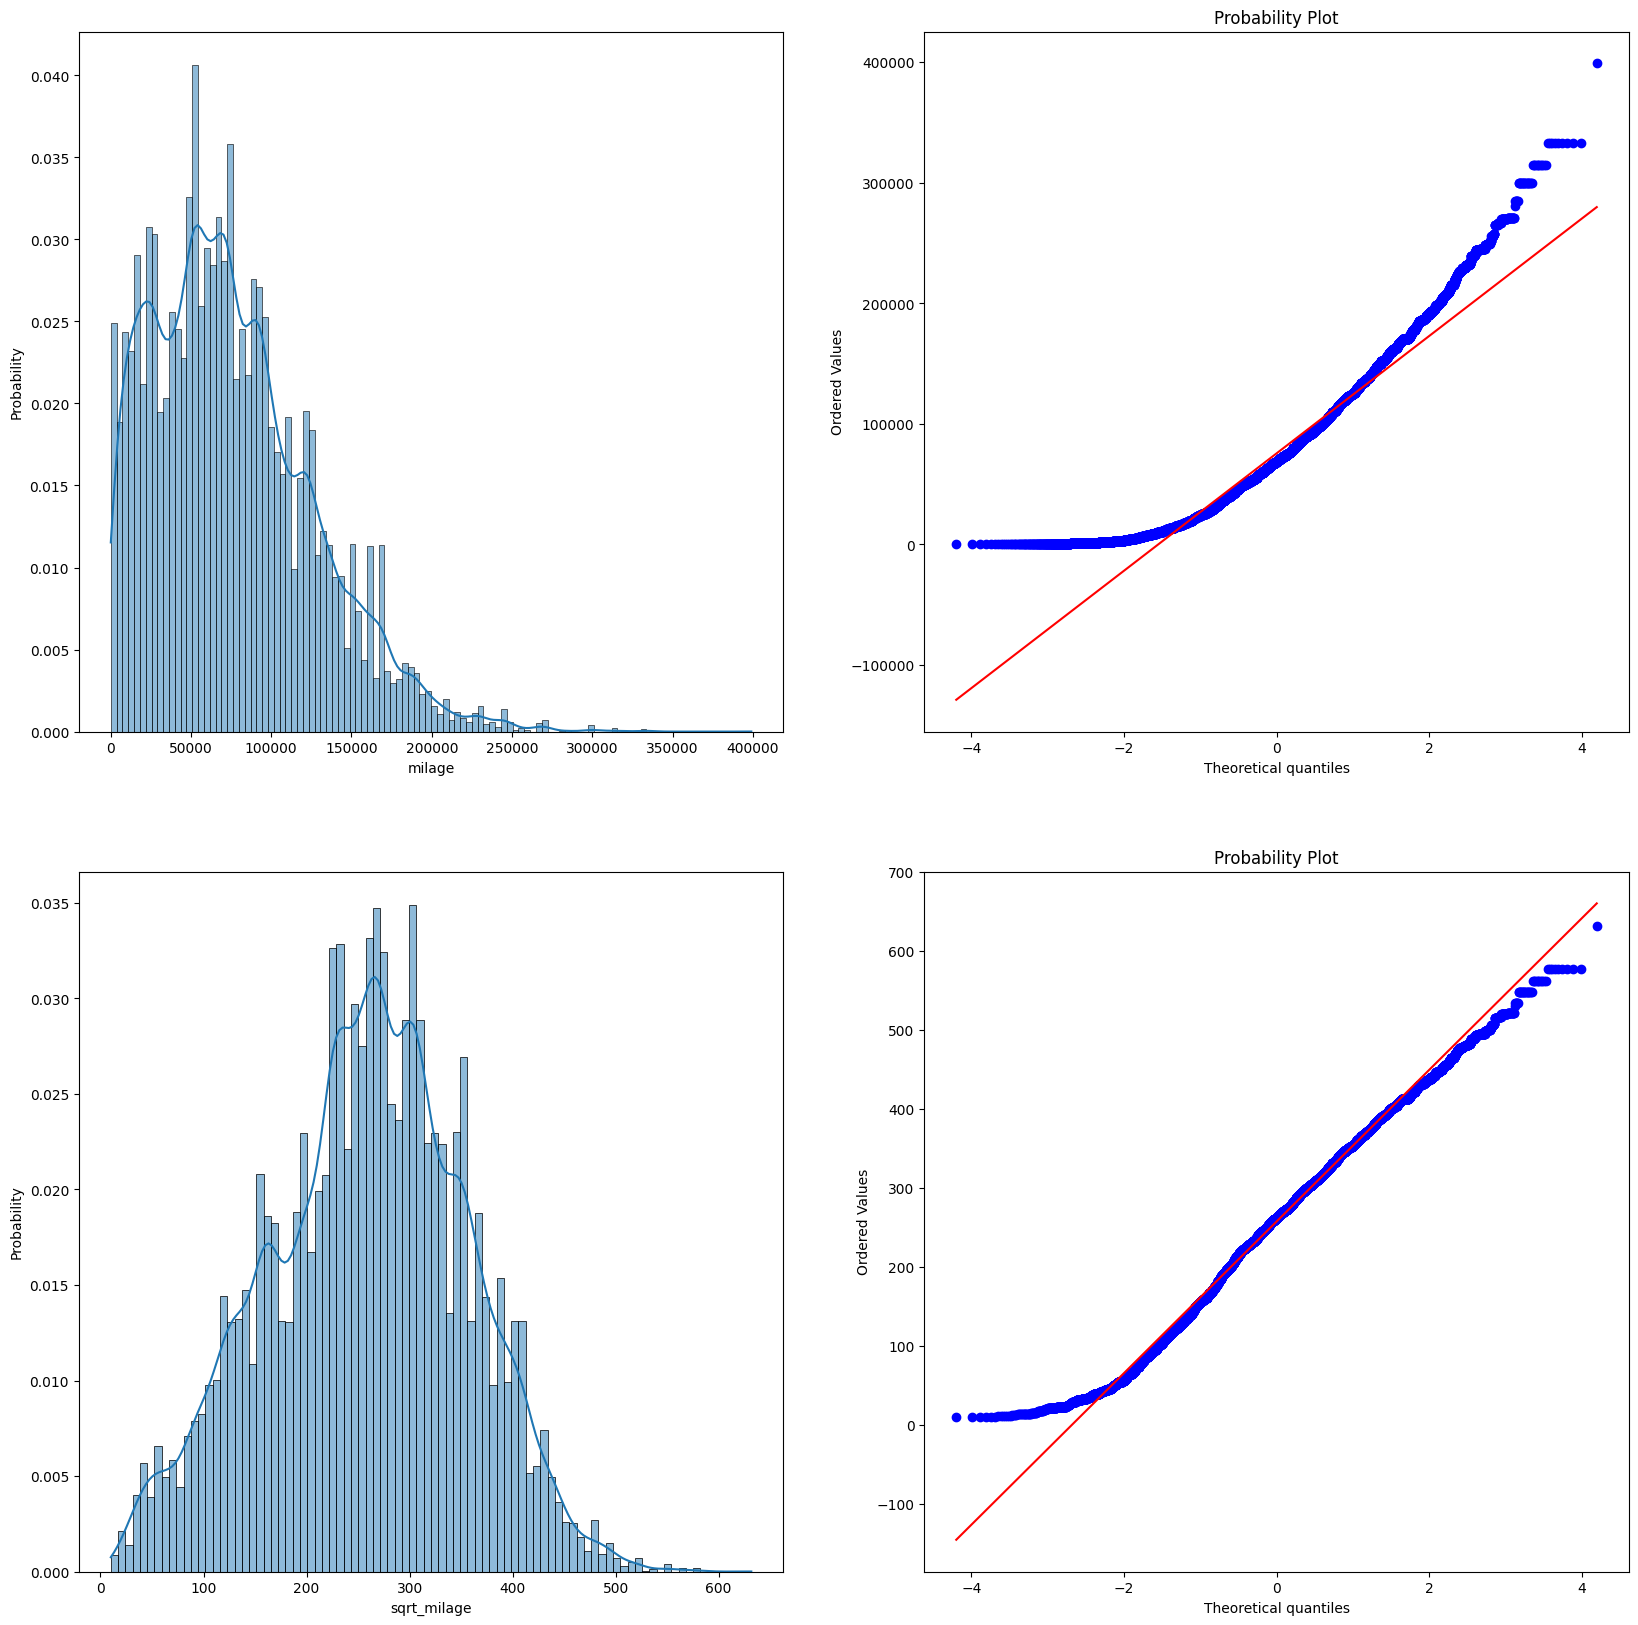

In [98]:
# milage
sqrt_trans = FunctionTransformer(np.sqrt, validate=True)
X_train['sqrt_milage']=sqrt_trans.transform(pd.DataFrame(X_train['milage']))
X_test['sqrt_milage']=sqrt_trans.transform(pd.DataFrame(X_test['milage']))
print(f"The skewness :{X_train['milage'].skew()}")
print(f"The skewness :{X_train['sqrt_milage'].skew()}")

fig, axes=plt.subplots(2,2,figsize=(20,20))
sns.histplot(X_train['milage'],kde=True,stat='probability',ax=axes[0,0])
stats.probplot(X_train['milage'],plot=axes[0,1])
sns.histplot(X_train['sqrt_milage'],kde=True,stat='probability',ax=axes[1,0])
stats.probplot(X_train['sqrt_milage'],plot=axes[1,1])

The skewness :0.6531862467304815
The skewness :0.16804341093349617


((array([-4.19659328, -3.99108752, -3.87905688, ...,  3.87905688,
          3.99108752,  4.19659328]),
  array([ 8.71779789,  8.71779789,  8.71779789, ..., 28.89636655,
         28.89636655, 28.89636655])),
 (2.7399391065355627, 17.785779249645223, 0.9960751407020607))

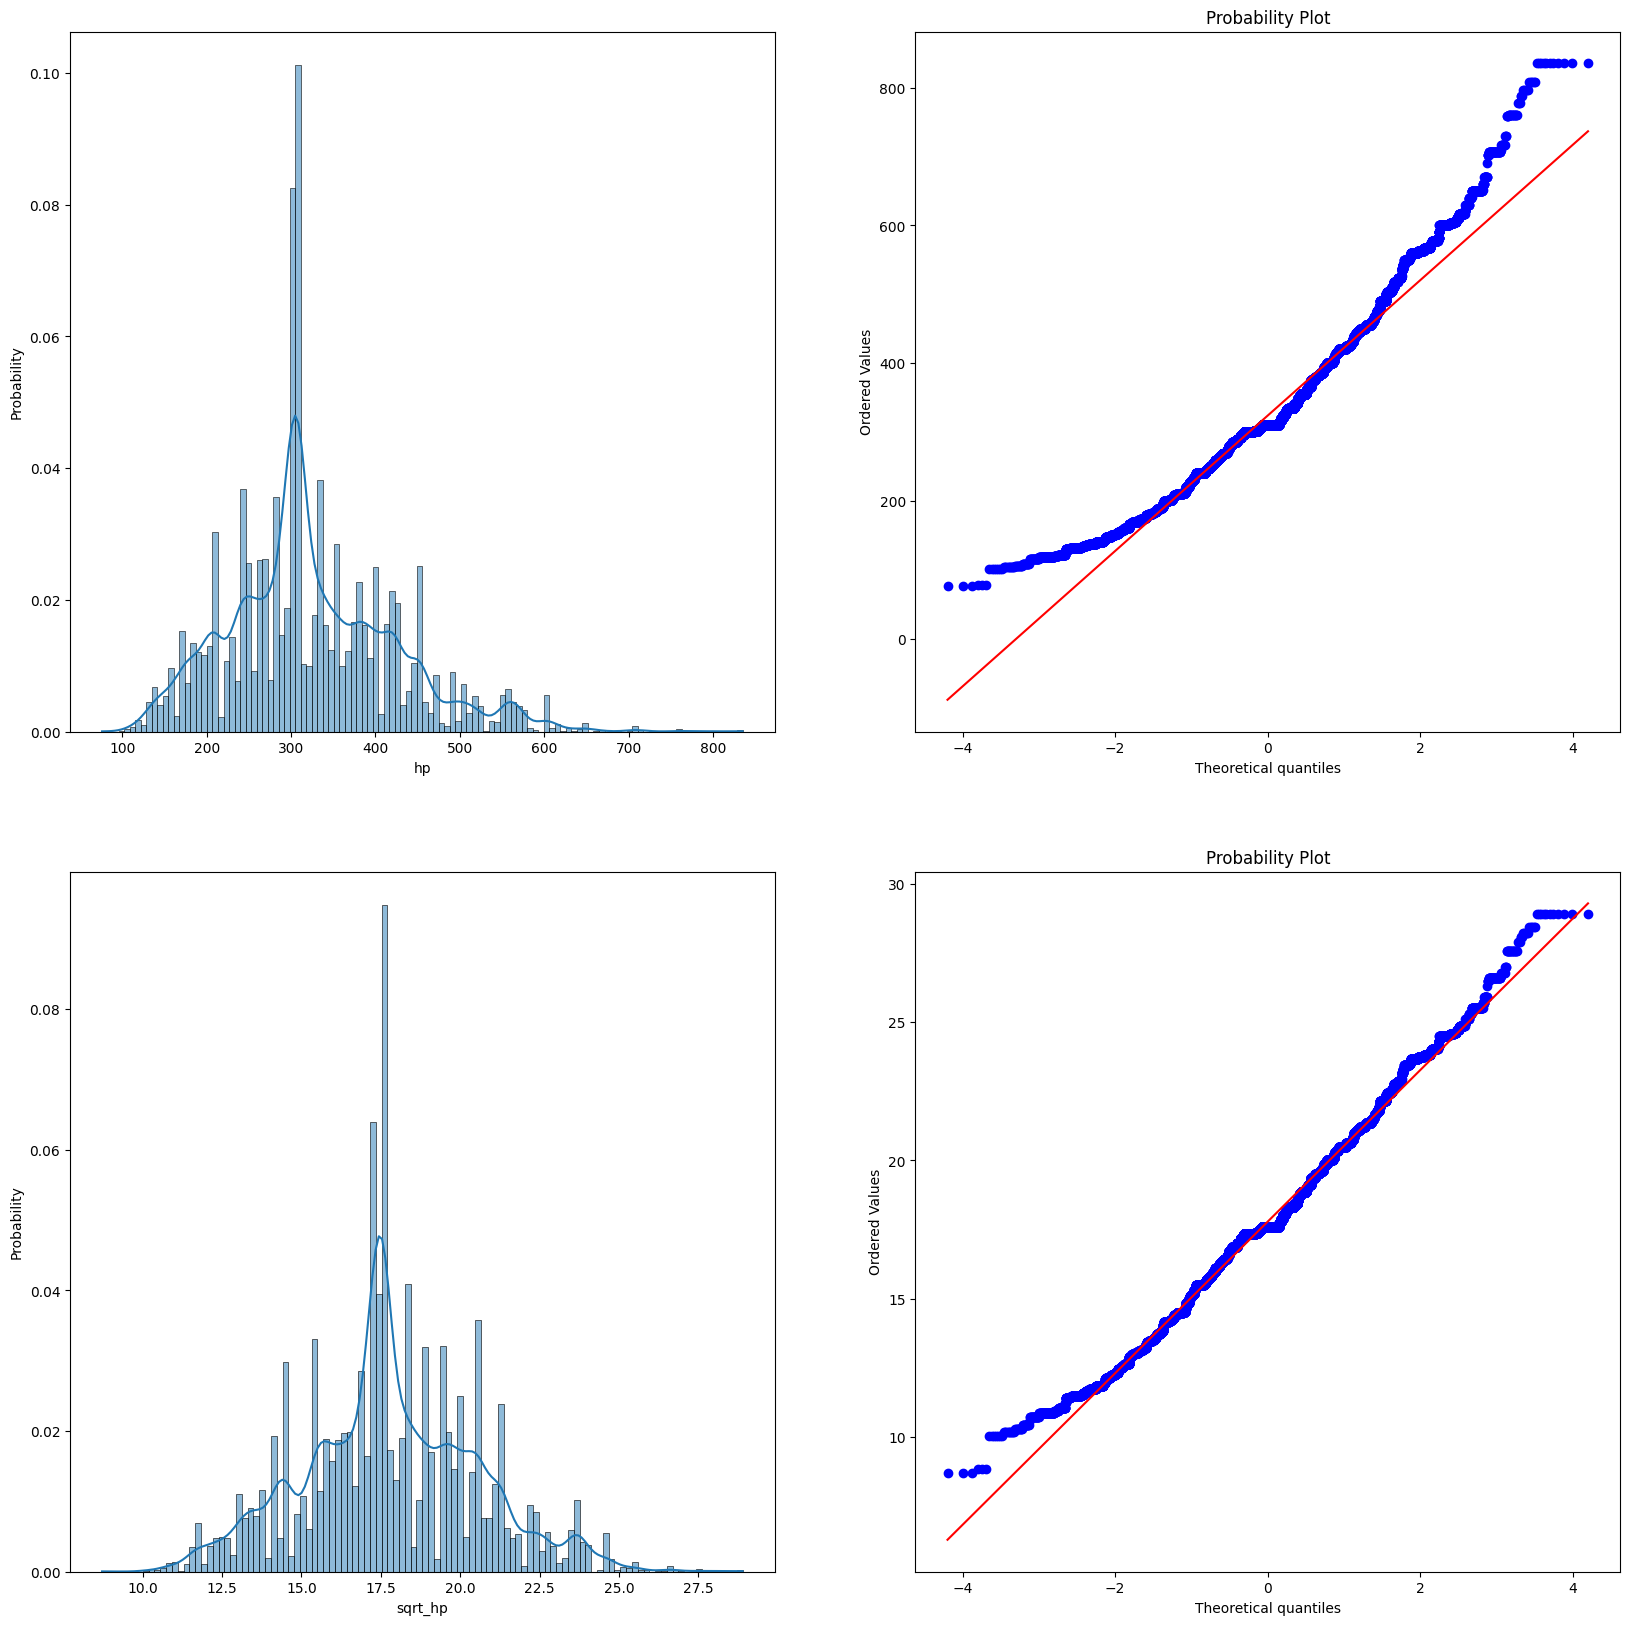

In [99]:
# hp
# sqrt_trans = FunctionTransformer(np.sqrt, validate=True)
X_train['sqrt_hp']=sqrt_trans.transform(pd.DataFrame(X_train['hp']))
X_test['sqrt_hp']=sqrt_trans.transform(pd.DataFrame(X_test['hp']))
print(f"The skewness :{X_train['hp'].skew()}")
print(f"The skewness :{X_train['sqrt_hp'].skew()}")

fig, axes=plt.subplots(2,2,figsize=(20,20))
sns.histplot(X_train['hp'],kde=True,stat='probability',ax=axes[0,0])
stats.probplot(X_train['hp'],plot=axes[0,1])
sns.histplot(X_train['sqrt_hp'],kde=True,stat='probability',ax=axes[1,0])
stats.probplot(X_train['sqrt_hp'],plot=axes[1,1])

The skewness :0.5485247319474349
The skewness :0.22047763824193517


((array([-4.19659328, -3.99108752, -3.87905688, ...,  3.87905688,
          3.99108752,  4.19659328]),
  array([0.80622577, 0.80622577, 0.80622577, ..., 2.88097206, 2.88097206,
         2.89827535])),
 (0.33588786898802203, 1.8893764517201397, 0.9816937392238345))

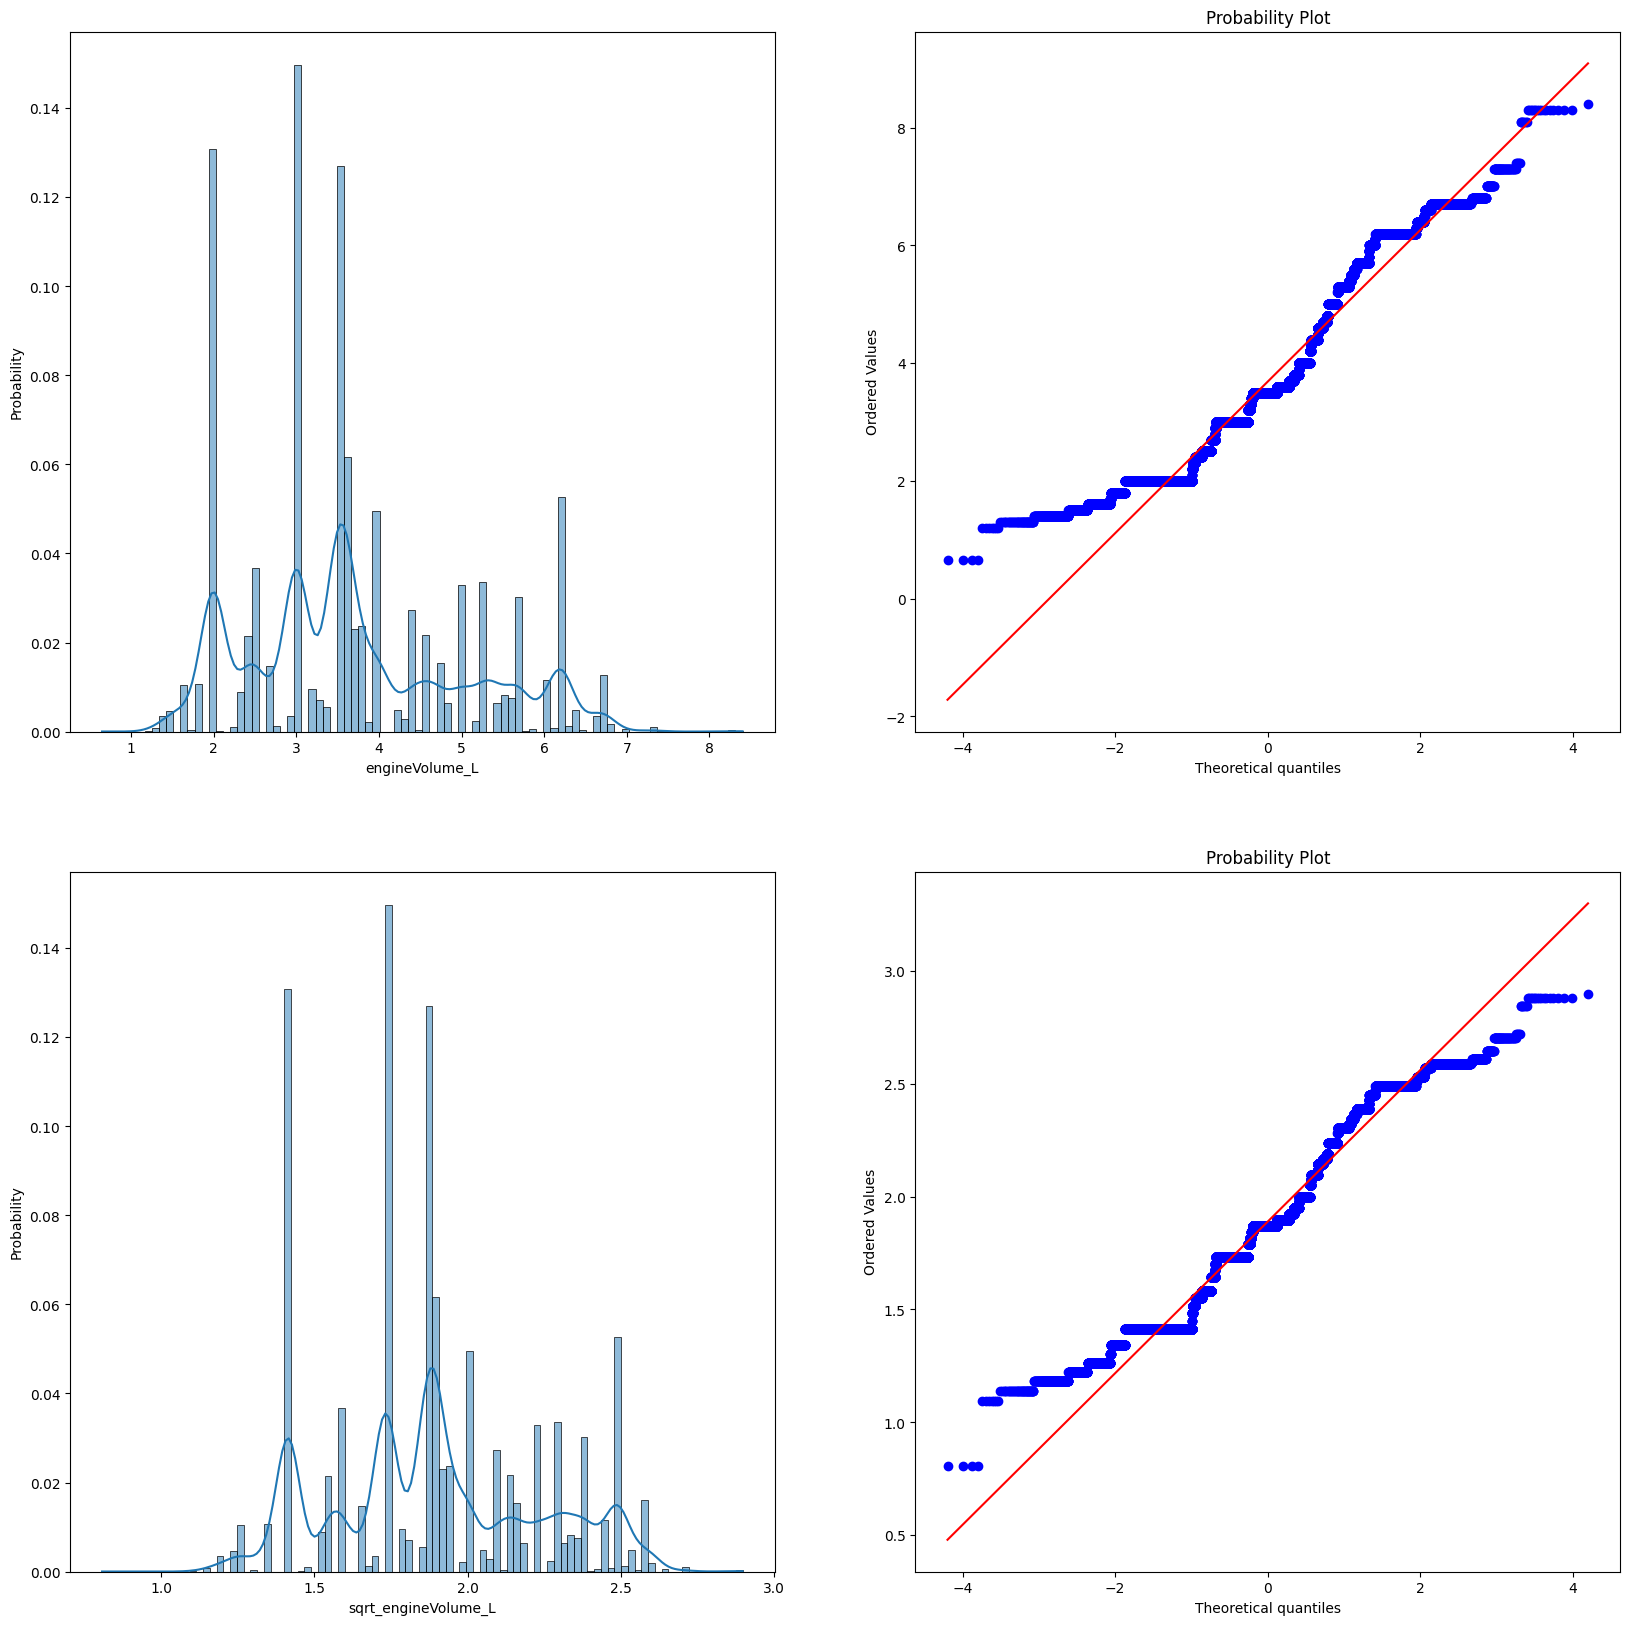

In [100]:
# engineVolume_L
# sqrt_trans = FunctionTransformer(np.sqrt, validate=True)
X_train['sqrt_engineVolume_L']=sqrt_trans.transform(pd.DataFrame(X_train['engineVolume_L']))
X_test['sqrt_engineVolume_L']=sqrt_trans.transform(pd.DataFrame(X_test['engineVolume_L']))

print(f"The skewness :{X_train['engineVolume_L'].skew()}")
print(f"The skewness :{X_train['sqrt_engineVolume_L'].skew()}")

fig, axes=plt.subplots(2,2,figsize=(20,20))
sns.histplot(X_train['engineVolume_L'],kde=True,stat='probability',ax=axes[0,0])
stats.probplot(X_train['engineVolume_L'],plot=axes[0,1])
sns.histplot(X_train['sqrt_engineVolume_L'],kde=True,stat='probability',ax=axes[1,0])
stats.probplot(X_train['sqrt_engineVolume_L'],plot=axes[1,1])

In [101]:
X_train[['model_year']].describe()

model_year
count  51162.000000
mean    2014.847426
std        5.556477
min     1974.000000
25%     2012.000000
50%     2016.000000
75%     2019.000000
max     2024.000000

In [102]:
# model_year
mm_scaler=MinMaxScaler()
mm_features=['mm_model_year']
minmax_scaler=mm_scaler.fit(X_train[['model_year']])
X_train[mm_features]=minmax_scaler.transform(X_train[['model_year']])
X_test[mm_features]=minmax_scaler.transform(X_test[['model_year']])

print(X_train[mm_features].describe())
print(f"The skewness :{X_train[['model_year']].skew()}")

       mm_model_year
count   51162.000000
mean        0.816949
std         0.111130
min         0.000000
25%         0.760000
50%         0.840000
75%         0.900000
max         1.000000
The skewness :model_year   -0.912422
dtype: float64


The skewness :-0.9124221520308601
The skewness :-0.27570842973237186


((array([-4.19659328, -3.99108752, -3.87905688, ...,  3.87905688,
          3.99108752,  4.19659328]),
  array([0., 0., 0., ..., 1., 1., 1.])),
 (0.20068762539757667, 0.5742500659082848, 0.9880550972202929))

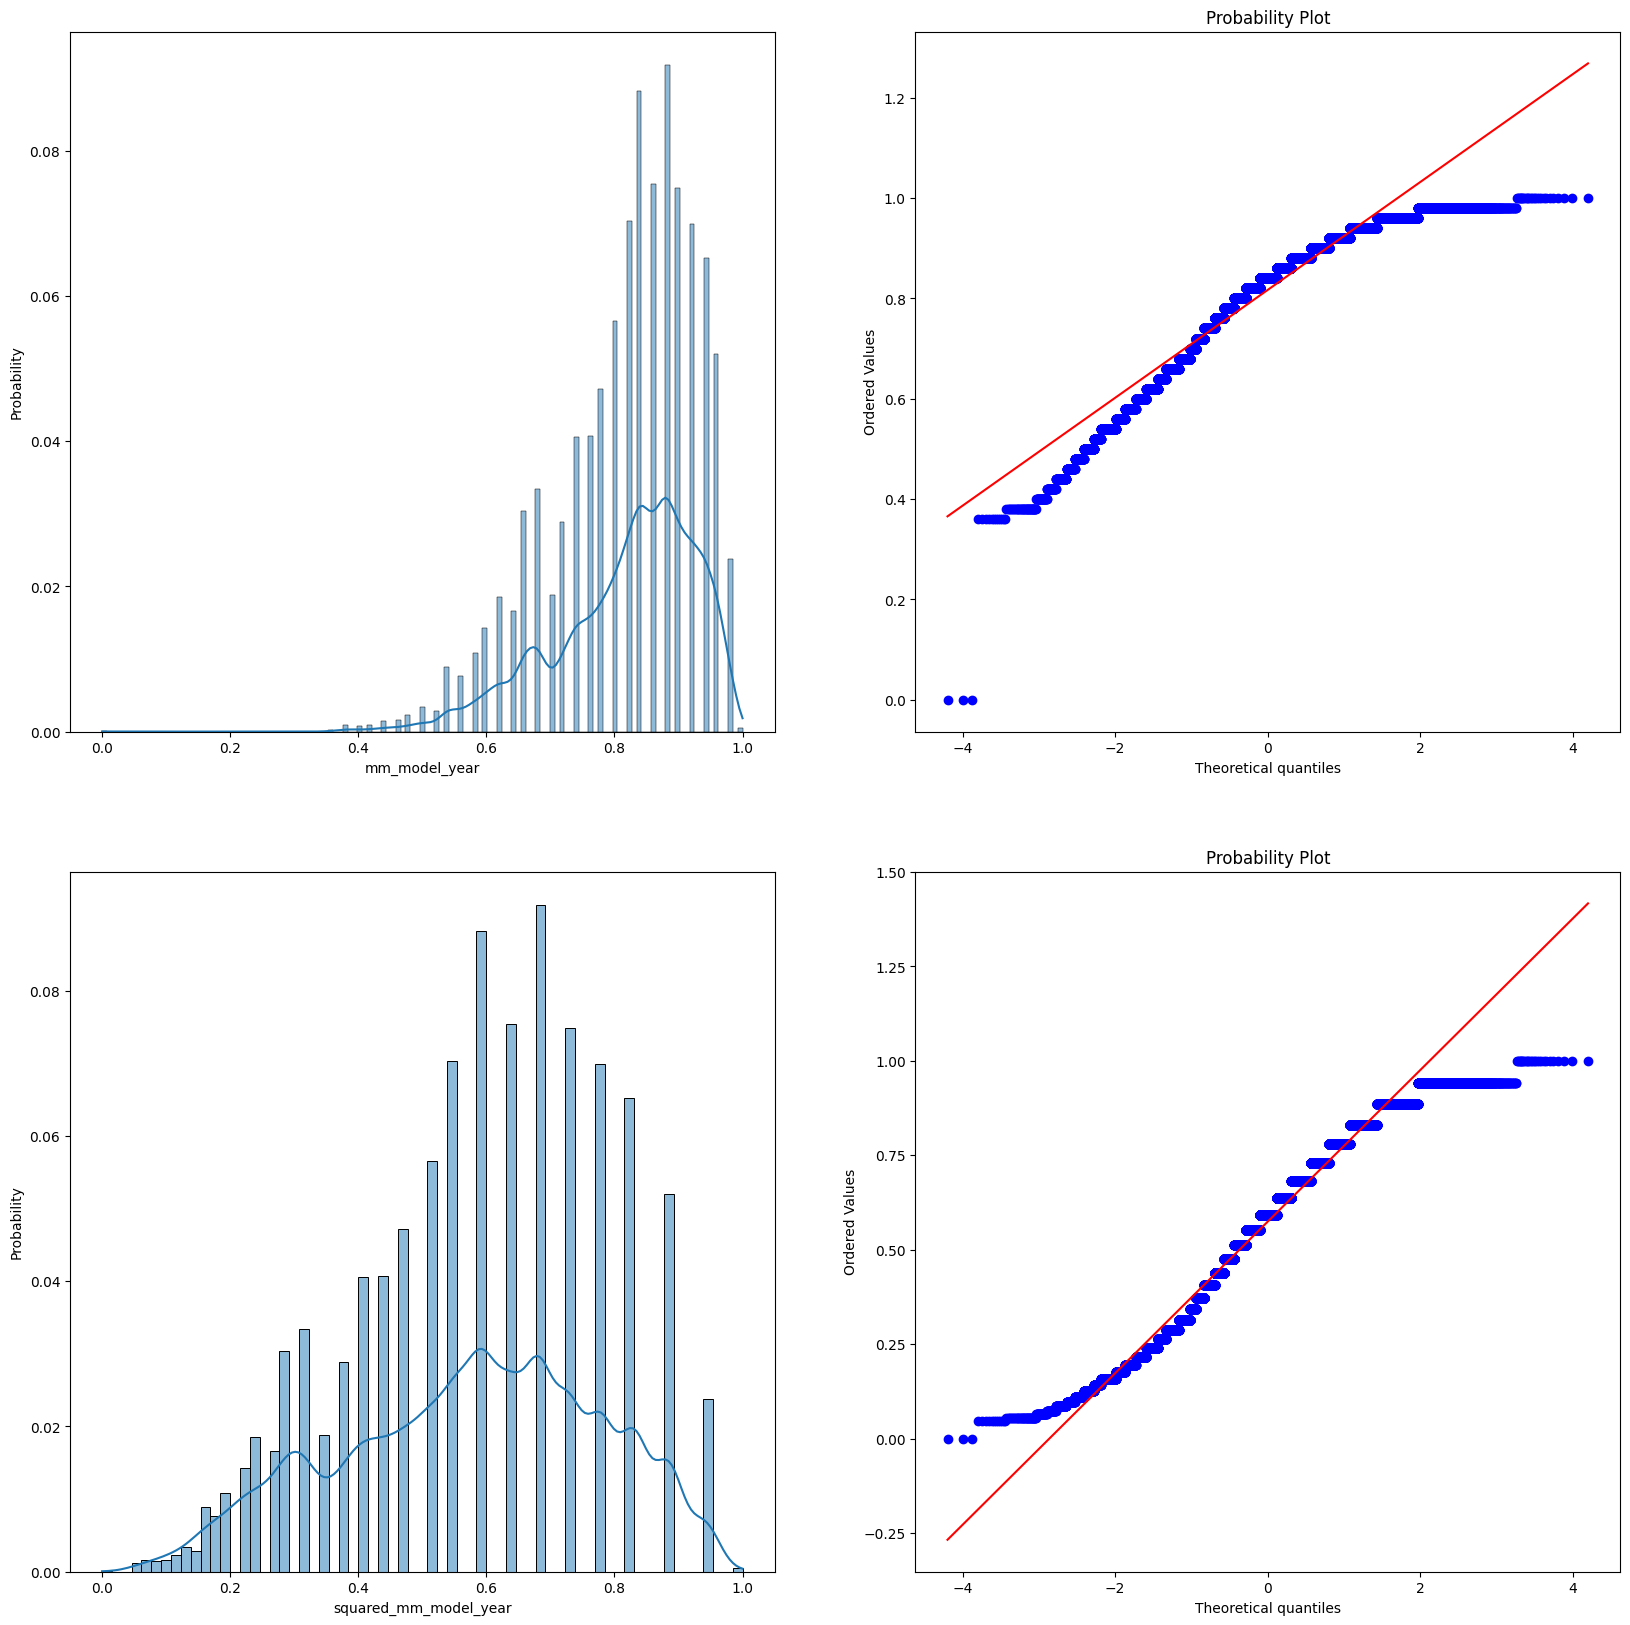

In [103]:
# model_year
X_train['squared_mm_model_year']=X_train['mm_model_year']**2
X_test['squared_mm_model_year']=X_test['mm_model_year']**2


cube_trans = FunctionTransformer(lambda x:x**3, validate=True)
X_train[['squared_mm_model_year']]=cube_trans.transform( X_train[['mm_model_year']])


print(f"The skewness :{X_train['mm_model_year'].skew()}")
print(f"The skewness :{X_train['squared_mm_model_year'].skew()}")
fig, axes=plt.subplots(2,2,figsize=(20,20))
sns.histplot(X_train['mm_model_year'],kde=True,stat='probability',ax=axes[0,0])
stats.probplot(X_train['mm_model_year'],plot=axes[0,1])

sns.histplot(X_train['squared_mm_model_year'],kde=True,stat='probability',ax=axes[1,0])
stats.probplot(X_train['squared_mm_model_year'],plot=axes[1,1])

In [104]:
X_train.drop(columns=['model_year','mm_model_year',\
                      'milage','engineVolume_L','hp'],inplace=True)

X_test.drop(columns=['model_year','mm_model_year',\
                      'milage','engineVolume_L','hp'],inplace=True)

In [105]:
std_scaler= StandardScaler()
column_names= [ col for col in X_train.columns 
               if col not in oh_features+['transmission','accident']]

std_scaler.fit(X_train[column_names])
std_features=std_scaler.transform(X_train[column_names])
std_features_test=std_scaler.transform(X_test[column_names])

X_train[column_names]=pd.DataFrame(std_features,columns=column_names)
X_test[column_names]=pd.DataFrame(std_features_test,columns=column_names)

# 2 Feature Engineering
- remvoe the unimportant features 
- using xgb forgest to measure the importance of the faeture 

In [106]:
X_train.shape

(51162, 62)

In [107]:
# import tensorflow_decision_forests as tfdf
import xgboost as xgb

In [108]:
 def obj_to_cat(df,cat_cols):
    '''
    convert dtype to categorical type
    
    args:
        df: pd dataframe
        cat_cols: a (list) of ‘category’  columns 
        
    return: ‘category’ type of columns
    '''
    print(cat_cols)
    for col in cat_cols:
        # 1st convert it to the categorical data type
        df[col]=df[col].astype('category')
        # 2nd if exiting null values
        if df[col].isnull().any():
            # new new categiry as NA
            df[col]=df[col].cat.add_categories(['NA'])
            df[col]=df[col].fillna('NA')


In [109]:
# xgb_reg=xgb.XGBRegressor(enable_categorical=True)
# xgb_features=[col for col in X_train.columns 
#          if col not in oh_features+grouped_features+\
#               ['model_year','mm_model_year','milage_format']]

# # cat_names=X_train[xgb_features].select_dtypes(exclude=[np.number]).columns.tolist()
# # ojb_to_cat(X_train,cat_names)

# xgb_reg.fit(X_train[xgb_features],y_train_log)

In [110]:
len(oh_features)

56

In [111]:
xgb_reg=xgb.XGBRegressor(enable_categorical=True) # with default h-params
# cat_names=X_train[xgb_features].select_dtypes(exclude=[np.number]).columns.tolist()
# ojb_to_cat(X_train,cat_names)

xgb_reg.fit(X_train,y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

                       importance
squared_mm_model_year    0.317463
sqrt_milage              0.067907
sqrt_hp                  0.059685
brand_Porsche            0.034139
brand_Mercedes-Benz      0.023167
fuel_type_Diesel         0.020375
sqrt_engineVolume_L      0.019952
brand_Chrysler           0.018846
brand_Hyundai            0.016405
brand_Mazda              0.015733
brand_Nissan             0.014808
brand_Jeep               0.013615
brand_Lincoln            0.012826
brand_Volvo              0.012777
brand_Lexus              0.012536
fuel_type_Hybrid         0.012373
accident                 0.011329
brand_INFINITI           0.011241
brand_Honda              0.010715
brand_Chevrolet          0.010464
fuel_type_Gasoline       0.010215
brand_Ford               0.009745
brand_Cadillac           0.009718
brand_Hummer             0.009677
brand_BMW                0.009598
brand_Dodge              0.009592
brand_Lotus              0.009576
brand_Rolls-Royce        0.009573
brand_Audi    

<Axes: >

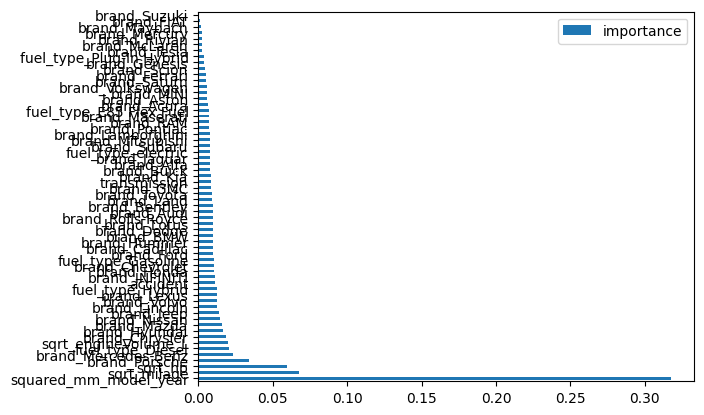

In [112]:
impt_features=pd.DataFrame(xgb_reg.feature_importances_,
                           columns=['importance'],
                           index=X_train.columns)
impt_features.sort_values(by='importance',ascending=False,inplace=True)
print(impt_features.head(40))
impt_features.plot.barh()

In [113]:
# using RFECV to determine the optimal number of features to keep
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, mean_squared_error

def rmse(y_ture,y_pred):
    return(mean_squared_error(y_ture,y_pred,squared=True)) # 
rmse_scorer=make_scorer(rmse,greater_is_better=False) 

In [114]:

# greater_is_better=True means no sing-flip

min_features_to_select=5

# rfecv=RFECV(xgb_reg,#estimator
#             step=1,# num of weakest feature to remove at each iteration
#             cv=5,# will do selection features 5 times
#             verbose=False,
#             scoring=rmse_scorer,
#             min_features_to_select = min_features_to_select)

# rfecv.fit(X_train ,y_train_log)
# print("Optimal number of features : %d" %rfecv.n_features_)

In [115]:
# rfecv.cv_results_.keys()

In [116]:
# len(rfecv.cv_results_['mean_test_score'])

In [117]:
# rfecv.cv_results_.keys()
# n_subsets_of_features = len(rfecv.cv_results_["mean_test_score"])
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Mean test score")
# plt.errorbar(
#     range(min_features_to_select, n_subsets_of_features + min_features_to_select),
#     rfecv.cv_results_["mean_test_score"],
#     yerr=rfecv.cv_results_["std_test_score"],
# )
# plt.title("Recursive Feature Elimination \nwith correlated features")
# # plt.vlines(rfecv.n_features_,-0.6,-0.4,color='r')
# plt.show()
# features_kept = X_train.columns.values[rfecv.support_] 

# # X_train_imp= X_train[features_kept]
# # X_test_imp=X_test[features_kept]

In [118]:
names=list(set(X_test.columns).intersection( set(X_train.columns)))

In [119]:
 len(impt_features[(impt_features.importance>0)].index)

62

In [120]:
X_train_impt=X_train[names].copy() #[impt_features[(impt_features.importance>0)].index]

In [121]:
y_train_log.mean()


10.089024059443046

In [122]:
y_train_log.max()

11.396391648714276

In [123]:
y_train_log.min()

7.600902459542082

In [124]:
y_train_log.std()

0.7201973152432224

In [125]:
X_train_impt.describe()

fuel_type_Diesel       sqrt_hp  brand_Genesis  brand_Jaguar  \
count      51162.000000  5.116200e+04   51162.000000  51162.000000   
mean           0.020269  2.506107e-16       0.004574      0.012314   
std            0.140920  1.000010e+00       0.067475      0.110283   
min            0.000000 -3.296834e+00       0.000000      0.000000   
25%            0.000000 -6.039834e-01       0.000000      0.000000   
50%            0.000000 -6.506511e-02       0.000000      0.000000   
75%            0.000000  6.395322e-01       0.000000      0.000000   
max            1.000000  4.039461e+00       1.000000      1.000000   

       brand_Nissan  fuel_type_Hybrid  brand_Toyota   brand_Lexus  \
count   51162.00000      51162.000000  51162.000000  51162.000000   
mean        0.02367          0.031195      0.044115      0.042825   
std         0.15202          0.173846      0.205352      0.202464   
min         0.00000          0.000000      0.000000      0.000000   
25%         0.00000          0.000000      0.000000      0.000000   
50%         0.00000          0.000000      0.000000      0.000000   
75%         0.00000          0.000000      0.000000      0.000000   
max         1.00000          1.000000      1.000000      1.000000   

       brand_Pontiac  fuel_type_Gasoline  ...   brand_Lotus      accident  \
count   51162.000000        51162.000000  ...  51162.000000  51162.000000   
mean        0.002873            0.916442  ...      0.000235      0.276729   
std         0.053526            0.276727  ...      0.015313      0.447386   
min         0.000000            0.000000  ...      0.000000      0.000000   
25%         0.000000            1.000000  ...      0.000000      0.000000   
50%         0.000000            1.000000  ...      0.000000      0.000000   
75%         0.000000            1.000000  ...      0.000000      1.000000   
max         1.000000            1.000000  ...      1.000000      1.000000   

         brand_MINI  brand_McLaren  brand_INFINITI    brand_Audi  \
count  51162.000000   51162.000000    51162.000000  51162.000000   
mean       0.007056       0.000489        0.018197      0.055080   
std        0.083704       0.022100        0.133665      0.228138   
min        0.000000       0.000000        0.000000      0.000000   
25%        0.000000       0.000000        0.000000      0.000000   
50%        0.000000       0.000000        0.000000      0.000000   
75%        0.000000       0.000000        0.000000      0.000000   
max        1.000000       1.000000        1.000000      1.000000   

       brand_Volkswagen  brand_Lamborghini  brand_Saturn  brand_Mitsubishi  
count      51162.000000       51162.000000  51162.000000      51162.000000  
mean           0.012138           0.001134      0.001134          0.003538  
std            0.109503           0.033651      0.033651          0.059375  
min            0.000000           0.000000      0.000000          0.000000  
25%            0.000000           0.000000      0.000000          0.000000  
50%            0.000000           0.000000      0.000000          0.000000  
75%            0.000000           0.000000      0.000000          0.000000  
max            1.000000           1.000000      1.000000          1.000000  

[8 rows x 61 columns]

## 3 Model

In [126]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [127]:
# # doest use in this competation 
# '''
# geneerate pipeline that 
# treats different features with different transformers, 
# while leaving some features untransformed

# # in training dataset  
# # y_train: y_train_log()  transform
# # milage_format: sqrt_trans() transform
# # model_year minmax_scaler() --> cube_trans()

# '''

# mm_scaler= MinMaxScaler()
# passthrough= 'passthrough'
# raw_features=[ col for col in X_train.columns 
#               if col not in ['milage_format','model_year']]


# #  define the transformers for different features

# num_trasnformer1=Pipeline(steps=[
#     ('mm scaler',mm_scaler),
#     ('cube trans',cube_trans)])
# num_tranformer2=Pipeline(steps=[
#     ('sqrt_trans',sqrt_trans)
# ])

# cat_transformer=Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # creat a columnTransformer
# preprocessor=ColumnTransformer(
# transformers=[
#     ('milage',num_tranformer2,['milage_format']),
#     ('model_year1',num_trasnformer1, ['model_year']),
#     ('others',passthrough, raw_features)
# ])

# # then you can 
# # preprocessor.fit_transform(df)

# 3.1 Model selection using X_train and y_train cv

In [128]:
from sklearn.linear_model import LinearRegression, RidgeCV

## 3.1.1 linear regression

In [129]:
linear=LinearRegression()
linear.fit(X_train_impt,
           y_train_log)

LinearRegression()

In [130]:
y_pred_linear=linear.predict(X_train_impt)
print(f"The dev RMSE is { rmse( y_train_log,y_pred_linear):.4f}")
print(f"The socre of R^2 for linear is %.4f" \
      %(linear.score(X_train_impt,y_train_log)))

The dev RMSE is 0.1795
The socre of R^2 for linear is 0.6540


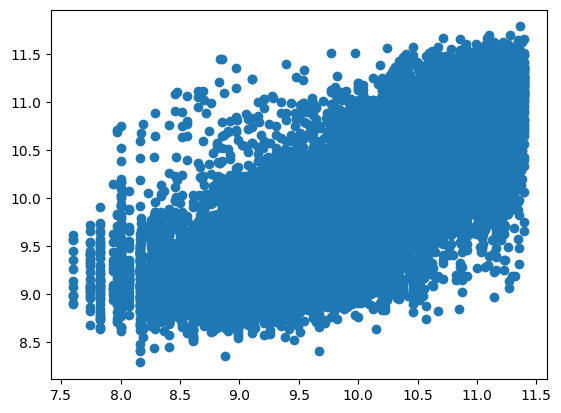

In [131]:
_y=pd.DataFrame({'y_true_log':y_train_log,
               'y_pred_log':y_pred_linear,
                'y_true':np.exp(y_train),
                'y_pred':np.exp(y_pred_linear)})
plt.scatter(_y['y_true_log'],
           _y['y_pred_log'])

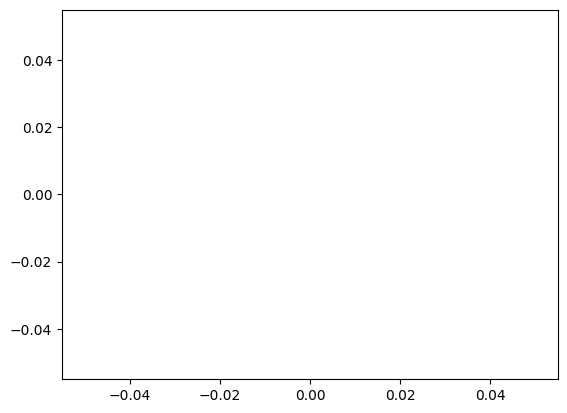

In [132]:
plt.scatter(_y['y_true'],
           _y['y_pred'])

## 3.1.2 RidgeCV regression

In [133]:

reg_ridgeCV=RidgeCV(alphas=np.logspace(-6, 6, 13),
#                     cv=5,
                    scoring=rmse_scorer,
                   store_cv_values=True
                   )
reg_ridgeCV.fit(X_train_impt,y_train_log)

y_pred_ridge=reg_ridgeCV.predict(X_train_impt)
print(f"Best alpha is {reg_ridgeCV.alpha_:.0e}" )
print(f"The dev RMSE is { rmse( y_train_log, y_pred_ridge):.4f}")
print(f"The socre of R^2 for reg_ridgeCV is %.4f" \
      %(reg_ridgeCV.score(X_train_impt,y_train_log)))

Best alpha is 1e-02
The dev RMSE is 0.1795
The socre of R^2 for reg_ridgeCV is 0.6540


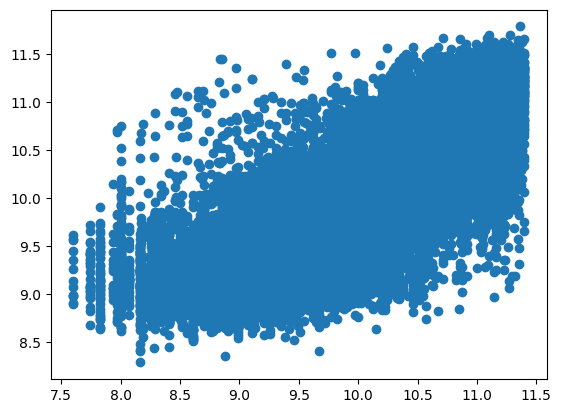

In [134]:
_y=pd.DataFrame({'y_true_log':y_train_log,
               'y_pred_log':y_pred_ridge,
                'y_true':np.exp(y_train_log),
                'y_pred':np.exp(y_pred_ridge)})
plt.scatter(_y['y_true_log'],
           _y['y_pred_log'])


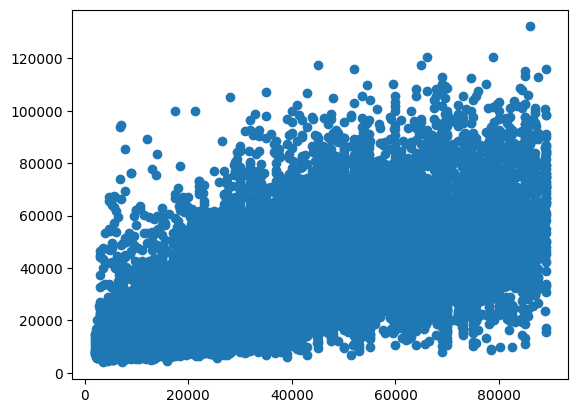

In [135]:
plt.scatter(_y['y_true'],
           _y['y_pred'])


## 3.1.3 XGBregressor

In [136]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [137]:
# model
reg_xgb=xgb.XGBRegressor(eval_metric=rmse_scorer)
# Evaluate the model with repeated k-fold cross-validation
cv=RepeatedKFold(n_splits=10,
                 n_repeats=3,
                 random_state=1)
#evaluate model
cv_scores=cross_val_score(reg_xgb,
                          X=X_train_impt,
                          y=y_train_log,
                         scoring=rmse_scorer,
                         cv=cv)
print(f" Mean RMSE: %.3f+-(%.3f)" %( cv_scores.mean(),cv_scores.std()))

# xgb_params={}
# DMatrix=xgb.DMatrix(data=X_dev_impt,
#          label=y_dev_log)


 Mean RMSE: -0.158+-(0.005)


In [138]:
 cv_scores

array([-0.15528044, -0.15706548, -0.14806663, -0.15658958, -0.16673844,
       -0.15499   , -0.16765832, -0.15794274, -0.16476542, -0.15229108,
       -0.16349912, -0.15775164, -0.15405034, -0.15869902, -0.16095345,
       -0.16064774, -0.15710033, -0.15905127, -0.15776507, -0.1524017 ,
       -0.16371473, -0.15650442, -0.1551506 , -0.15771984, -0.15131096,
       -0.16175772, -0.15056007, -0.16198461, -0.15513553, -0.16957516])

In [139]:
reg_xgb.fit(X_train_impt,y_train_log)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=make_scorer(rmse, greater_is_better=False),
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [140]:
X_train.columns

Index(['transmission', 'accident', 'brand_Acura', 'brand_Alfa', 'brand_Aston',
       'brand_Audi', 'brand_BMW', 'brand_Bentley', 'brand_Buick',
       'brand_Cadillac', 'brand_Chevrolet', 'brand_Chrysler', 'brand_Dodge',
       'brand_FIAT', 'brand_Ferrari', 'brand_Ford', 'brand_GMC',
       'brand_Genesis', 'brand_Honda', 'brand_Hummer', 'brand_Hyundai',
       'brand_INFINITI', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia',
       'brand_Lamborghini', 'brand_Land', 'brand_Lexus', 'brand_Lincoln',
       'brand_Lotus', 'brand_MINI', 'brand_Maserati', 'brand_Maybach',
       'brand_Mazda', 'brand_McLaren', 'brand_Mercedes-Benz', 'brand_Mercury',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Pontiac', 'brand_Porsche',
       'brand_RAM', 'brand_Rivian', 'brand_Rolls-Royce', 'brand_Saturn',
       'brand_Scion', 'brand_Subaru', 'brand_Suzuki', 'brand_Tesla',
       'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'fuel_type_Diesel',
       'fuel_type_E85 Flex Fuel', 'fuel_type_Gasolin

In [141]:
len(y_train_log)

51162

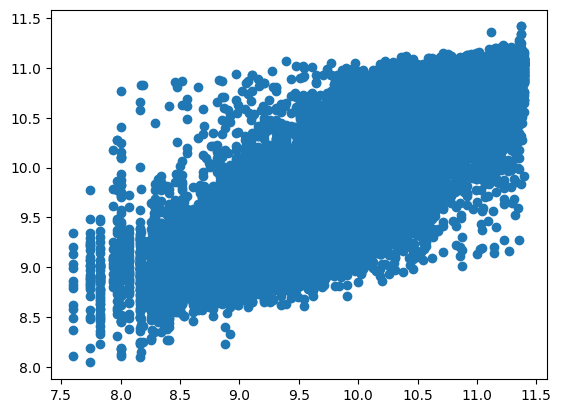

In [142]:
y_pred_xgb=reg_xgb.predict(X_train_impt)
 
_y=pd.DataFrame({'y_true_log':y_train_log,
               'y_pred_log':y_pred_xgb,
                'y_true':np.exp(y_train_log),
                'y_pred':np.exp(y_pred_xgb)})
plt.scatter(_y['y_true_log'],
           _y['y_pred_log'])

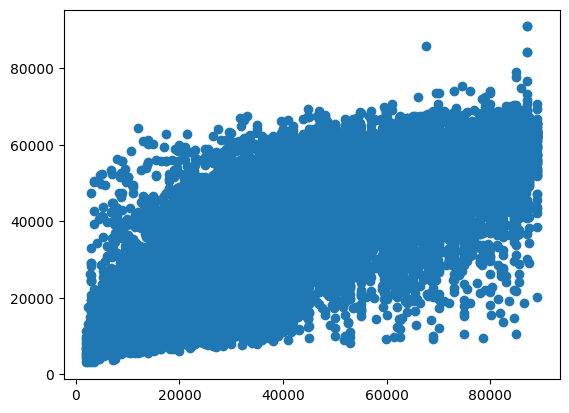

In [143]:
plt.scatter(_y['y_true'],
           _y['y_pred'])
# plt.xlim(0, 1.4e6)
# plt.ylim(0, 1.4e6)

In [144]:
reg_xgb.get_booster()

In [145]:
print(reg_xgb.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': make_scorer(rmse, greater_is_better=False), 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


# 3.2  Xgboost_turning

In [146]:
from sklearn.model_selection import learning_curve

## 3.2.1 training datasize

In [147]:
# training datasize


def plot_learning_curve(model,X,y):
    '''
    ploting performance as train_sizes
    args:
        X: X_train
        y: y_train
    return:
    '''
    #train_sizes (size of n_tickes)
    # train_scores and test_scores (n_ticks, n_cv_folds)
    train_sizes,train_scores,test_scores=learning_curve(estimator=model,
                  X=X,
                  y=y,
                  train_sizes=[0.1, 0.33, 0.55, 0.78, 1.], #n_ticks=5
                  cv=10,
                  scoring=rmse_scorer)
    
    # calculate score for each tick
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes,
             train_scores_mean, 
             label='Training Accuracy', 
             color='blue')
    plt.fill_between(train_sizes, 
                     train_scores_mean -2*train_scores_std,
                     train_scores_mean + 2*train_scores_std,
                     alpha=0.2, color='blue')
   
    plt.plot(train_sizes, test_scores_mean, 
             label='Validation Accuracy', color='green')
    plt.fill_between(train_sizes, 
                     test_scores_mean - 2*test_scores_std, 
                     test_scores_mean + 2*test_scores_std, 
                     alpha=0.2, color='green')
    
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean RMSE')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    print(train_sizes)
    

In [148]:
X_train_impt.shape

(51162, 61)

In [149]:
import time

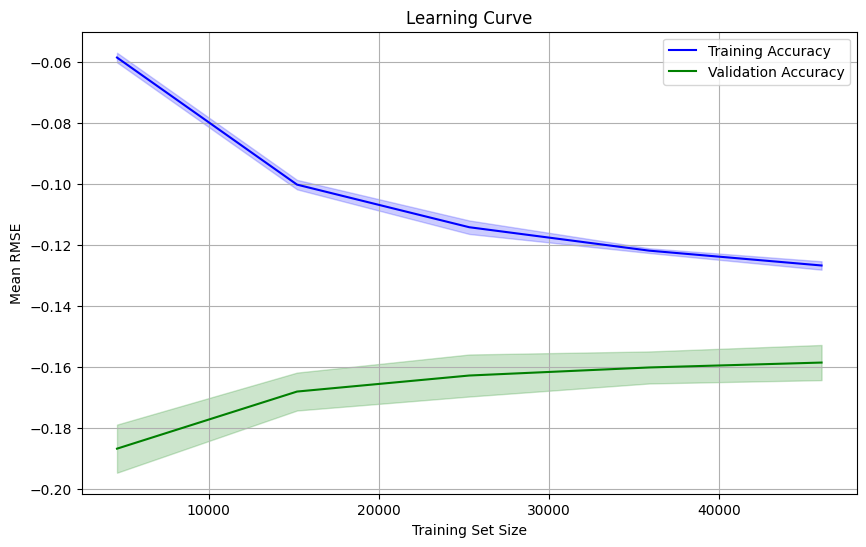

[ 4604 15194 25324 35915 46045]
CPU times: user 1min 59s, sys: 683 ms, total: 2min
Wall time: 31.1 s


In [150]:
# training datasize

reg_xgb=xgb.XGBRegressor(eval_metric=rmse_scorer)
%time plot_learning_curve(reg_xgb,X_train_impt,y_train_log)

<b> [comments]</b>

RMSE_train<RMSE_dev --> variance (overfitting)

# Improve Results

## 3.2.2 hyper-paramenters turning 

In [151]:
# search on hyper parameters
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [152]:
# default n_estimators=100,max_depth=6, learning_Rate=0.3
reg_xgb=xgb.XGBRegressor(eval_metric=rmse_scorer)
rmse_scorer=make_scorer(rmse,greater_is_better=False) 

param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10],
            'learning_rate':[0.01,0.05,0.1,0.15]}
rand_search_cv=RandomizedSearchCV(estimator=reg_xgb,
#                             param_grid=param_grid,
                          param_distributions=param_grid,
                                  cv=5,
                          n_iter=10,
                          scoring=rmse_scorer, #'neg_mean_squared_error',
                           verbose=4,
                          random_state=1234,
                          )

In [153]:
%%time
rand_search_cv.fit(X_train_impt,y_train_log)

print()
best_xgb=rand_search_cv.best_estimator_
print(f"Mean RMSE for the best model is {rand_search_cv.best_score_:.2f}")
print(f"best params_  for the best model is {rand_search_cv.best_params_}")
   

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=-0.155 total time=   5.7s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=-0.156 total time=   5.5s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=-0.159 total time=   5.5s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=-0.157 total time=   5.5s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=1000;, score=-0.157 total time=   5.4s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=-0.160 total time=   0.6s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=-0.161 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=-0.164 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, score=-0.161 total time=   0.6s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100;, s

In [154]:

best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=make_scorer(rmse, greater_is_better=False),
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

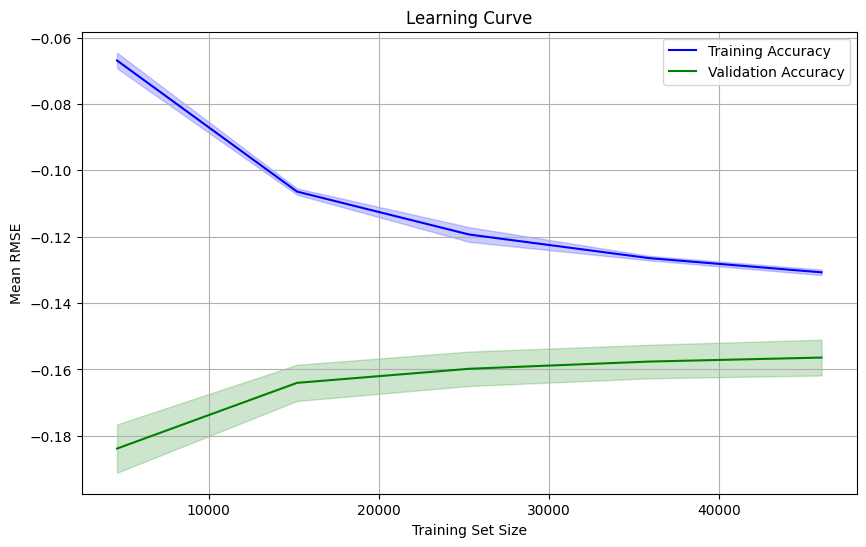

[ 4604 15194 25324 35915 46045]


In [155]:
plot_learning_curve(best_xgb,X_train_impt,y_train_log)

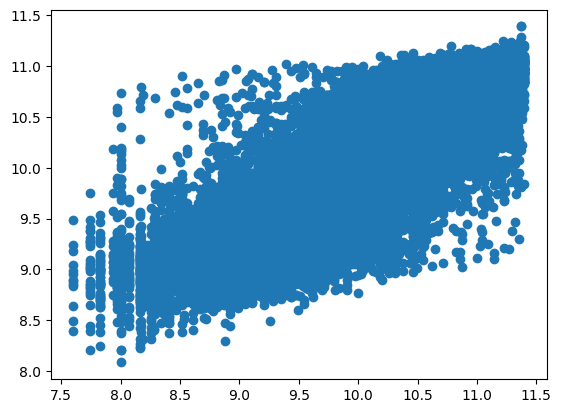

In [156]:
y_pred_best_xgb=best_xgb.predict(X_train_impt)

_y=pd.DataFrame({'y_true_log':y_train_log,
               'y_pred_log':y_pred_best_xgb,
                'y_true':np.exp(y_train_log),
                'y_pred':np.exp(y_pred_best_xgb)})
plt.scatter(_y['y_true_log'],
           _y['y_pred_log'])


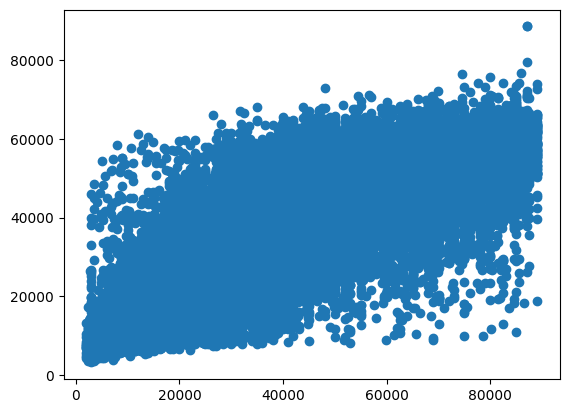

In [157]:
plt.scatter(_y['y_true'],
           _y['y_pred'])
# plt.plot([0,0],[2e6, 2e6],color='red')
# plt.xlim(1,2e6)
# plt.ylim(1,60000)

In [158]:
y_train_log_pred=pd.DataFrame({'price':best_xgb.predict(X_train_impt)})
                                 
print(y_train_log_pred[0:5])
y_train_pred=np.squeeze(log_trans.inverse_transform(y_train_log_pred ))
print(y_train_pred[0:5])
print(y_train[0:5])
rmse_train=rmse(y_train,y_train_pred)

# rmse_train.mean()
# rmse_train.std()

       price
0  10.438573
1   9.636244
2   9.430359
3  10.967231
4   9.313869
[34151.88   15309.73   12460.998  57943.91   11090.7705]
0    11000
1     8250
2    15000
3    63500
4     7850
Name: price, dtype: int64


In [159]:
rmse_train

118207917.65114973

In [160]:
# names=list(set(X_test.columns).intersection( set(X_train.columns)))

In [161]:
X_test=X_test[names]

In [162]:
y_test_log_pred=pd.DataFrame({'price':best_xgb.predict(X_test)})
                                 
print(y_test_log_pred[0:5])
y_test_pred=np.squeeze(log_trans.inverse_transform(y_test_log_pred ))
print(y_test_pred[0:5])
# print(y_train[0:5])
# rmse_train=rmse(y_train,y_train_pred)

       price
0  10.245646
1   9.955586
2  10.262650
3  10.857071
4  10.415144
[28159.682 21069.6   28642.604 51899.836 33361.04 ]


In [163]:
y_train_log[0:5]

array([ 9.30565055,  9.01796848,  9.61580548, 11.05879518,  8.96826881])

# Error Analysis

Text(0.5, 1.0, 'Train')

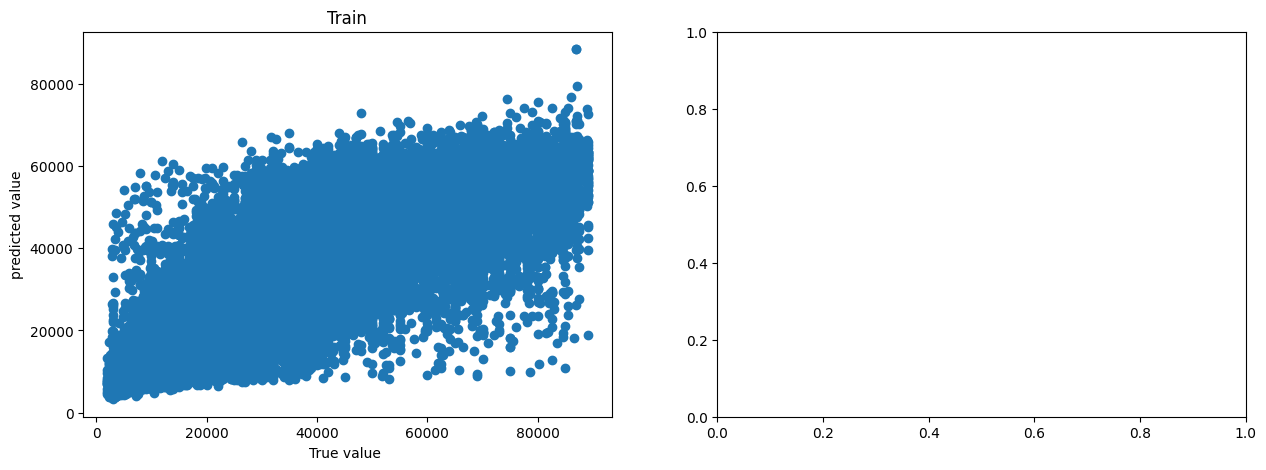

In [164]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(np.exp(y_train_log),np.exp(y_train_log_pred))
ax1.set_xlabel('True value ')
ax1.set_ylabel('predicted value')
ax1.set_title('Train')
# ax2.scatter(y_test,test_prediction,c=(y_test-test_prediction).abs(),cmap='autumn')
# ax2.set_xlabel('actual')
# ax2.set_ylabel('prediction')
# ax2.set_title('Test')

In [165]:
submission=pd.DataFrame({'id':id_test,
                 'price':y_test_pred})

<Axes: >

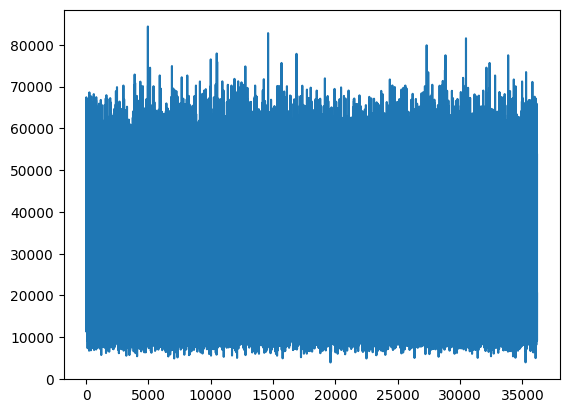

In [166]:
submission['price'].plot()

# Submission

In [167]:
submission.to_csv('/kaggle/working/submissionKaggleX.csv',sep='\t')